## Telecom Churn Case Study(Machine learning -II)

### Problem Statement:

**Business problem overview**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of **15-25% annual churn rate**. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, **retaining high profitable customers is the number one business goal.**

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Definitions of churn:**

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this case study, we will use the **usage-based** definition to define churn.

**High-value churn:**

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric (mentioned later below) and **predict churn only on high-value customers.**



**Business Objective:**

The business objective is to **predict the churn in the last (i.e. the ninth) month** using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

**Different Phases in Customer churn:**

It is intutive that, to predict whether the customer will churn or not and what are the driving forces behind the customer churn, one must understand the various phases the customer goes through before he/she decides to switch to another network operator.

* The **good** phase: In this phase, the customer is happy with the service and behaves as usual.

* The **action** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

* The **churn** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case study, the dataset contains a 4-month window, the *first two months* are the **good** phase, the *third month* is the **action** phase, while the *fourth month* is the **churn** phase.

**How to seggregate High-Value customers?**

High-value customers are defined as follows: Those who have recharged with an amount more than or equal to X, where X is the **70th percentile of the average recharge amount in the first two months**(the good phase).

**How to Tag as churners for customers?**

Tag the churned customers (**churn=1, else 0**) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


**Modelling Requirement**

The predictive models need to serve two purposes:

* It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

* It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

**Why do we need multiple Models?:**

* Here, We have a large number of attributes, and thus we should try using a dimensionality reduction technique such as PCA and then build a predictive model for customer churning. 

* The model created by PCA is generally not easy to interpret. Hence we need another strong classification model to identify the significant factors that can impact the customer churning.

* After PCA, we can use any classification model like the Logistict Regression or any Tree families.

* Since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - we need to apply techniques to handle class imbalance. 

**Approach for Predictive Model(i):**

* Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

* EDA to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

* Derive new features/Dummies.

* Apply PCA for dimensionality reduction.

* Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

* Model evaluation using appropriate metrics.

**Importing Necessary Libraries**

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

#Importing Data Visualisation and EDA Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')
plt.style.use('ggplot') ## setting the plot style as ggplot for the plots that we are going to use

#Importing libraries to suppress warnings generated by Python Libraries.
import warnings
warnings.filterwarnings('ignore')

#Importing Model-Building & Evaluating Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report


pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

**Reading and Understanding the data set**

In [2]:
#Reading the data set using pandas module
telecom_df = pd.read_csv("telecom_churn_data.csv",parse_dates = True)

In [3]:
#checking the shape of the dataframe
telecom_df.shape

(99999, 226)

In [4]:
#printing the first five rows of the dataframe
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#printing the last five rows of the dataframe
telecom_df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [6]:
#Printing all the columns and theier datatypes
##Printing the column information summary from the data set
## Using Pandas info to observe the list of columns.
telecom_df.info(verbose=True  #number of attributes is quite very high. So using verbose to show all the features 
               ,show_counts=True
               )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [7]:
#Printing the statistical summary for the numerical features
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

**Observation**

* There are 99999 rows and 226 columns.

* There are some missing values in some of the columns. Let us continue to observe & understand the dataset.

In [8]:
#Priniting the Percentile details for the data set
telecom_df.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
#filtering the features based on the Types 

feature_split = pd.DataFrame(telecom_df.nunique())
feature_split.reset_index(inplace = True)
feature_split.columns = ['Feature','Unique count']
feature_split

,Feature,Unique count
0,mobile_number,99999
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
8,last_date_of_month_9,1
9,arpu_6,85681


Identifying id, numerical, categorical and date features : 

Features with less than 30 unique values are considered as categorical.

In [10]:
#segregating al categorical columns
categorical_columns = list(feature_split[feature_split['Unique count'] <= 30]['Feature'])
categorical_columns = list(telecom_df[categorical_columns].select_dtypes(include = ['int64','float64']).columns)
categorical_columns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [11]:
#Seggregting all Numerical Features
numerical_columns = list(feature_split[feature_split['Unique count'] > 30]['Feature'])
numerical_columns = list(telecom_df[numerical_columns].select_dtypes(include = ['int64','float64']).columns)
numerical_columns

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [12]:
#Identifying the Id columns

id_columns = ['circle_id','mobile_number']
numerical_columns.remove('mobile_number')
categorical_columns.remove('circle_id')

In [13]:
## Printing the Features

print("1. ID column: %d\n2. Numeric column:%d\n3. Category column:%d" % (len(id_columns), len(numerical_columns), len(categorical_columns)))
print("\n")
print('Length of columns :', len(telecom_df.columns))
print('Length of columns (Individual sum after split) :',len(id_columns) + len(numerical_columns) + len(categorical_columns))

1. ID column: 2
2. Numeric column:177
3. Category column:35


Length of columns : 226
Length of columns (Individual sum after split) : 214


### Checking Missing Value Percentages

In [14]:
#Printing the missing value percentage for each features in the descending Order
round(telecom_df.isnull().mean().sort_values(ascending= False)*100,2)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [15]:
#Taking a backup of the data set
telecom_df_data_backup = telecom_df.copy()

In [16]:
#Identifying all the recharge related columns and storing
recharge_columns = list(telecom_df.filter(regex = 'rech').columns)
recharge_columns = list(telecom_df[recharge_columns].select_dtypes(include = ['int64','float64']).columns)
telecom_df[recharge_columns].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [17]:
# Count the rows having more than 50% missing values
telecom_df_rows_50 = telecom_df[(telecom_df.isnull().sum(axis=1)) > (len(telecom_df.columns)//2)]
telecom_df_rows_50.shape

(2296, 226)

## Data Cleaning

### Missing Value Imputation

## i) Imputing with zeroes

In [18]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
telecom_df.loc[telecom_df.total_rech_data_6.isnull() & telecom_df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [19]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [20]:
# impute missing values with 0
telecom_df[zero_impute] = telecom_df[zero_impute].apply(lambda x: x.fillna(0))

In [21]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(telecom_df[zero_impute].isnull().sum()*100/telecom_df.shape[1])

# summary
print("\n\nSummary statistics\n")
print(telecom_df[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

#### Dropping All the Id Columns and the Date columns as they are not useful for the Models.

In [22]:
#Dropping Id Cols & Date Cols
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

# drop id and date columns
print("Shape before dropping: ", telecom_df.shape)
telecom_df = telecom_df.drop(id_columns + date_cols, axis=1)
print("Shape after dropping: ", telecom_df.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


## ii) Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [23]:
# replace missing values with '-1' in categorical columns
telecom_df[categorical_columns] = telecom_df[categorical_columns].apply(lambda x: x.fillna(-1))

In [24]:
# missing value ratio
print("Missing value ratio:\n")
print(telecom_df[categorical_columns].isnull().sum()*100/telecom_df.shape[0])

Missing value ratio:

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
std_og_t2c_mou_6    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_t2c_mou_9    0.0
std_ic_t2o_mou_6    0.0
std_ic_t2o_mou_7    0.0
std_ic_t2o_mou_8    0.0
std_ic_t2o_mou_9    0.0
count_rech_3g_6     0.0
count_rech_3g_7     0.0
count_rech_3g_8     0.0
count_rech_3g_9     0.0
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_2g_9        0.0
monthly_3g_6        0.0
monthly_3g_7        0.0
monthly_3g_8        0.0
monthly_3g_9        0.0
sachet_3g_6         0.0
sachet_3g_7         0.0
sachet_3g_8         0.0
sachet_3g_9         0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


## iii) Drop variables with more than a given threshold of missing values

In [25]:
# We are dropping all the features that has the missing value percentage > 70%

original_cols = telecom_df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(telecom_df.apply(lambda column: True if column.isnull().sum()/telecom_df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':telecom_df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [26]:
# drop columns
telecom_df = telecom_df.loc[:, include_cols]

dropped_cols = telecom_df.shape[1] - original_cols
print("{0} columns dropped.".format(dropped_cols))

-12 columns dropped.


In [27]:
missing = pd.DataFrame(round((telecom_df.isnull().sum()/len(telecom_df)*100),2))
missing.columns = ['Percentage']
actual_missing_columns = list(missing[missing['Percentage'] > 0].index)
actual_missing_columns

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


**(iv)- Missing Value Imputation using MICE**

  **MICE - Multiple Imputation by Chained Equation**

* For Missing value imputations, we are going to use Sci-Kit Learn module's IterativeImputer method.

**Iterative Imputer**

* It is Multivariate imputer  that estimates each feature from all the others.A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

**Mean,Median Vs Iterative Imputations**

* The mean,median and strategies will fill in all missing values with the same value and will not necessarily fit the overall trend. The iterative imputation strategy, however, will be able to utilize the information contained in other features to approximate the value instead, leading to a much cleaner imputation that more accurately fits the trend.

**References:**
  
  * https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

  * https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38

In [28]:
# Imputing with MICE

#Importing necessary libraries for iterative Impputations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

#Initializing the Imputation methos
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge()
                                ,n_nearest_features=None
                                ,imputation_order='ascending'
                                ,random_state=42)

#Using Iterative Imputation, we are imputing the features with missing values
telecom_df[actual_missing_columns] = pd.DataFrame(mice_imputer.fit_transform(telecom_df[actual_missing_columns])
                                                 )

In [29]:
#Printing the results to verify and confirm there are no missing values.
print(telecom_df.isnull().sum()*100/telecom_df.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

# Identify and Filter high-value customers (HVC)

### Calculating total data recharge amount

In [30]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_df['total_data_rech_6'] =telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6
telecom_df['total_data_rech_7'] = telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7

**Adding total data recharge and total recharge to get total combined recharge amount for a month**

In [31]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_df['amt_data_6'] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_6
telecom_df['amt_data_7'] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_7

In [32]:
# calculate average recharge done by customer in June and July
telecom_df['av_amt_data_6_7'] = (telecom_df.amt_data_6 + telecom_df.amt_data_7)/2

In [33]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom_df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [34]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_hvc = telecom_df.loc[telecom_df.av_amt_data_6_7 >= telecom_df.av_amt_data_6_7.quantile(0.7), :]
telecom_hvc = telecom_hvc.reset_index(drop=True)
telecom_hvc.shape

(30001, 205)

In [35]:
# delete variables created to filter high-value customers
telecom_hvc = telecom_hvc.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_hvc.shape

(30001, 200)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

## Deriving the Target Variable Based on Usage: churn

**Churners are the customers, who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.**

The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

* Based on this, we tag the customers wheter they churn or not ( churn =1 , else=0)

In [36]:
# calculate total incoming and outgoing minutes of usage
telecom_hvc['total_calls_mou_9'] = telecom_hvc.total_ic_mou_9 + telecom_hvc.total_og_mou_9

In [37]:
# calculate 2g and 3g data consumption
telecom_hvc['total_internet_mb_9'] =  telecom_hvc.vol_2g_mb_9 + telecom_hvc.vol_3g_mb_9

In [38]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
telecom_hvc['churn'] = telecom_hvc.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [39]:
# delete derived variables
telecom_hvc = telecom_hvc.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [40]:
# change data type to category
telecom_hvc.churn = telecom_hvc.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom_hvc.churn.value_counts()*100/telecom_hvc.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


**Churn Imbalance**

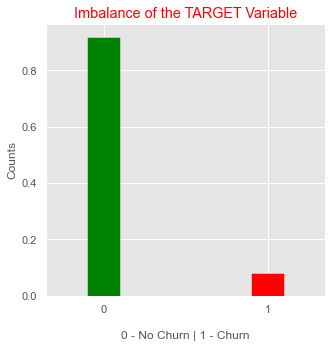

In [41]:
# Checking Imbalance using Value counts and the visualising using Bar plot
#Using Pandas in-built plot function, we can plot a horizontal bar-graph
telecom_hvc.churn.value_counts(normalize=True).plot(kind = 'bar'   # kind of plot is bar plot
                                   ,width = 0.2   # to adjust the width of the bar plot
                                   ,figsize = (5,5)  # to adjust the figure plot size
                                  ,color=['green','red'] #to differentiate the colors for each bool target variable valie
                                  )
plt.title ("Imbalance of the TARGET Variable", color ="Red") # matplotlib.pyplot function to provide title for the plot
plt.xticks(rotation = 0) # matplotlib.pyplot function to adjust the rotation of the x-tickes
plt.xlabel ("\n0 - No Churn | 1 - Churn") # function to provide label for x-axis
plt.ylabel("Counts") # function to provide label for y axis
plt.show() #function to show the plot

**Observation**

* Churn rate is approx 8.6% 

* Very high imbalance is found here in the data set.

* about 92% of the hvc are not churning and the churn rate is only 8%.

* This imbalance needs to be addressed while building the model.

# Calculate difference between 8th and previous months

### New Features Derivation

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [42]:
telecom_hvc['arpu_diff'] = telecom_hvc.arpu_8 - ((telecom_hvc.arpu_6 + telecom_hvc.arpu_7)/2)

telecom_hvc['onnet_mou_diff'] = telecom_hvc.onnet_mou_8 - ((telecom_hvc.onnet_mou_6 + telecom_hvc.onnet_mou_7)/2)

telecom_hvc['offnet_mou_diff'] = telecom_hvc.offnet_mou_8 - ((telecom_hvc.offnet_mou_6 + telecom_hvc.offnet_mou_7)/2)

telecom_hvc['roam_ic_mou_diff'] = telecom_hvc.roam_ic_mou_8 - ((telecom_hvc.roam_ic_mou_6 + telecom_hvc.roam_ic_mou_7)/2)

telecom_hvc['roam_og_mou_diff'] = telecom_hvc.roam_og_mou_8 - ((telecom_hvc.roam_og_mou_6 + telecom_hvc.roam_og_mou_7)/2)

telecom_hvc['loc_og_mou_diff'] = telecom_hvc.loc_og_mou_8 - ((telecom_hvc.loc_og_mou_6 + telecom_hvc.loc_og_mou_7)/2)

telecom_hvc['std_og_mou_diff'] = telecom_hvc.std_og_mou_8 - ((telecom_hvc.std_og_mou_6 + telecom_hvc.std_og_mou_7)/2)

telecom_hvc['isd_og_mou_diff'] = telecom_hvc.isd_og_mou_8 - ((telecom_hvc.isd_og_mou_6 + telecom_hvc.isd_og_mou_7)/2)

telecom_hvc['spl_og_mou_diff'] = telecom_hvc.spl_og_mou_8 - ((telecom_hvc.spl_og_mou_6 + telecom_hvc.spl_og_mou_7)/2)

telecom_hvc['total_og_mou_diff'] = telecom_hvc.total_og_mou_8 - ((telecom_hvc.total_og_mou_6 + telecom_hvc.total_og_mou_7)/2)

telecom_hvc['loc_ic_mou_diff'] = telecom_hvc.loc_ic_mou_8 - ((telecom_hvc.loc_ic_mou_6 + telecom_hvc.loc_ic_mou_7)/2)

telecom_hvc['std_ic_mou_diff'] = telecom_hvc.std_ic_mou_8 - ((telecom_hvc.std_ic_mou_6 + telecom_hvc.std_ic_mou_7)/2)

telecom_hvc['isd_ic_mou_diff'] = telecom_hvc.isd_ic_mou_8 - ((telecom_hvc.isd_ic_mou_6 + telecom_hvc.isd_ic_mou_7)/2)

telecom_hvc['spl_ic_mou_diff'] = telecom_hvc.spl_ic_mou_8 - ((telecom_hvc.spl_ic_mou_6 + telecom_hvc.spl_ic_mou_7)/2)

telecom_hvc['total_ic_mou_diff'] = telecom_hvc.total_ic_mou_8 - ((telecom_hvc.total_ic_mou_6 + telecom_hvc.total_ic_mou_7)/2)

telecom_hvc['total_rech_num_diff'] = telecom_hvc.total_rech_num_8 - ((telecom_hvc.total_rech_num_6 + telecom_hvc.total_rech_num_7)/2)

telecom_hvc['total_rech_amt_diff'] = telecom_hvc.total_rech_amt_8 - ((telecom_hvc.total_rech_amt_6 + telecom_hvc.total_rech_amt_7)/2)

telecom_hvc['max_rech_amt_diff'] = telecom_hvc.max_rech_amt_8 - ((telecom_hvc.max_rech_amt_6 + telecom_hvc.max_rech_amt_7)/2)

telecom_hvc['total_rech_data_diff'] = telecom_hvc.total_rech_data_8 - ((telecom_hvc.total_rech_data_6 + telecom_hvc.total_rech_data_7)/2)

telecom_hvc['max_rech_data_diff'] = telecom_hvc.max_rech_data_8 - ((telecom_hvc.max_rech_data_6 + telecom_hvc.max_rech_data_7)/2)

telecom_hvc['av_rech_amt_data_diff'] = telecom_hvc.av_rech_amt_data_8 - ((telecom_hvc.av_rech_amt_data_6 + telecom_hvc.av_rech_amt_data_7)/2)

telecom_hvc['vol_2g_mb_diff'] = telecom_hvc.vol_2g_mb_8 - ((telecom_hvc.vol_2g_mb_6 + telecom_hvc.vol_2g_mb_7)/2)

telecom_hvc['vol_3g_mb_diff'] = telecom_hvc.vol_3g_mb_8 - ((telecom_hvc.vol_3g_mb_6 + telecom_hvc.vol_3g_mb_7)/2)

In [43]:
# let's look at summary of one of the difference variables
telecom_hvc['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

#### Drop Features related to Churn Phase (9th/Sep Month)

**Removing all the features from the dataframe corresponding to churn phase - 9**

* After deriving the target feature, it is important that, the features related to the churn phase needs to be dropped. This is to ensure that, the model does not learn anything from the data set and to avoid the problem of over-fitting.


In [44]:
#Using a Regular Expression, dropping all the features related to Churn Phase
telecom_hvc = telecom_hvc.drop(telecom_hvc.filter(regex='_9|sep', axis = 1).columns, axis=1)
telecom_hvc.shape

(30001, 175)

### EDA - Exploratory Data Analysis

In [45]:
# storing all the categorical features
cat_cols = list(telecom_hvc.columns[telecom_hvc.dtypes == "object"]) # Features with String Object data types

In [46]:
#storing all the Continuous Features
cont_cols=telecom_hvc.select_dtypes(include=np.number).columns.tolist()

In [47]:
#some useful functions to do univariate and bivariate analysis
    
def uni_var_eda(attr):
    if attr.dtype == np.int64 or attr.dtype == np.float64:
        sns.distplot(attr,label = attr,hist=False)
    elif attr.dtype == 'O':
        sns.countplot(attr)
        
def bi_var_eda(attr1, attr2):
    if (attr1.dtype == np.int64 or attr1.dtype == np.float64) and (attr2.dtype == np.int64 or attr2.dtype == np.float64):
        sns.distplot(attr1, attr1)
    elif (attr1.dtype == 'O' and (attr2.dtype == np.int64 or attr2.dtype == np.float64) ) or ((attr1.dtype == np.int64 or attr1.dtype == np.float64) and attr2.dtype == 'O'):        
        sns.barplot(attr1, attr2)

**Univariate Analysis**

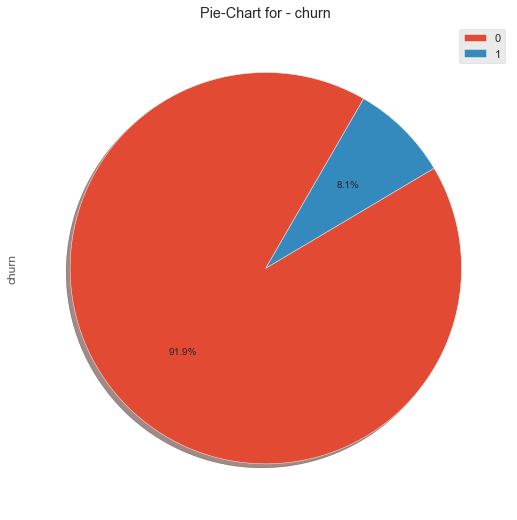

In [48]:
#Target Variable Analysis
plt.figure(figsize= [15,9]) #to adjust the plot size
#using pandas plot method, plotting a pie graph
telecom_hvc["churn"].value_counts().plot.pie(autopct='%1.1f%%' #to auto convert the values to percentages
                                         ,shadow=True # to display the shadow feature
                                         ,startangle=60 
                                         ,labeldistance=None
                                         )
plt.title("Pie-Chart for - {}".format("churn"))
plt.legend()
plt.show()

**Observation**

* Target variable - churn is **highly Imbalanced**.

* About 92% of the hvc are not churning and the churn rate is only 8%.


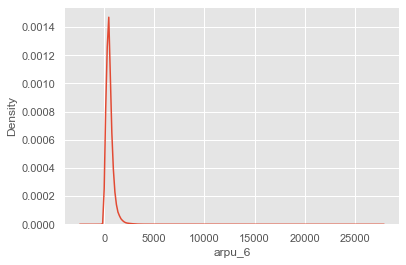

In [49]:
uni_var_eda(telecom_hvc.arpu_6)

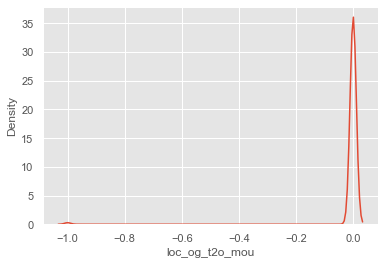

In [50]:
uni_var_eda(telecom_hvc.loc_og_t2o_mou)

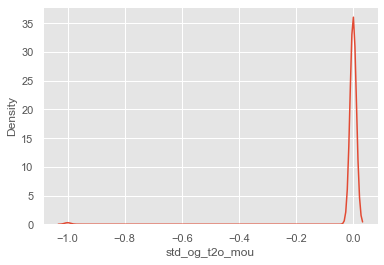

In [51]:
uni_var_eda(telecom_hvc.std_og_t2o_mou)

**Segmented Uni-Variate Analysis - Against Target**

In [52]:
telecom_hvc_0 = telecom_hvc[telecom_hvc["churn"] == 0 ]
telecom_hvc_1 = telecom_hvc[telecom_hvc["churn"] == 1 ]

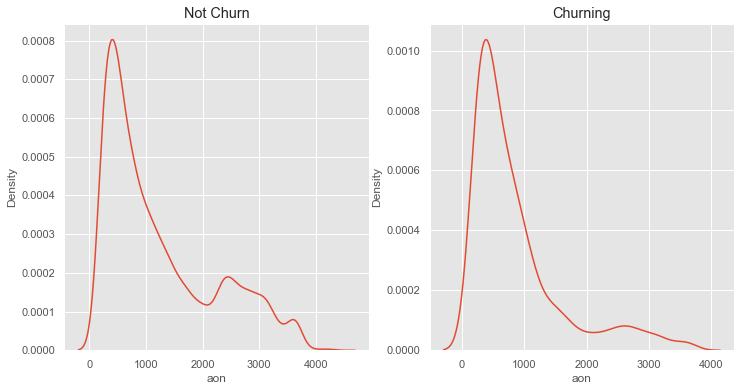

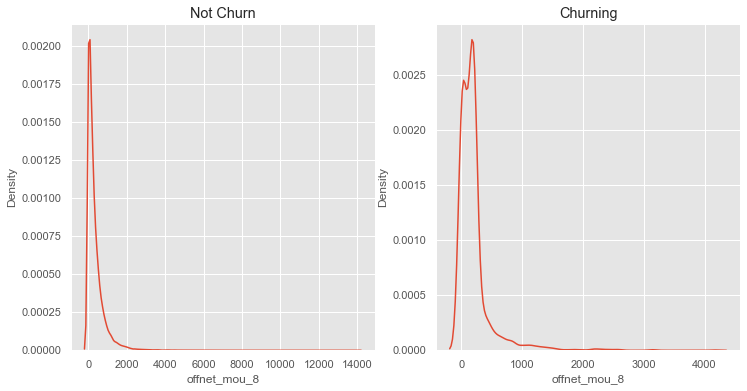

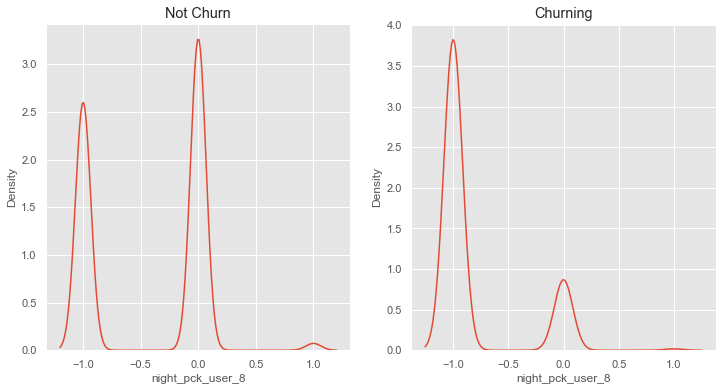

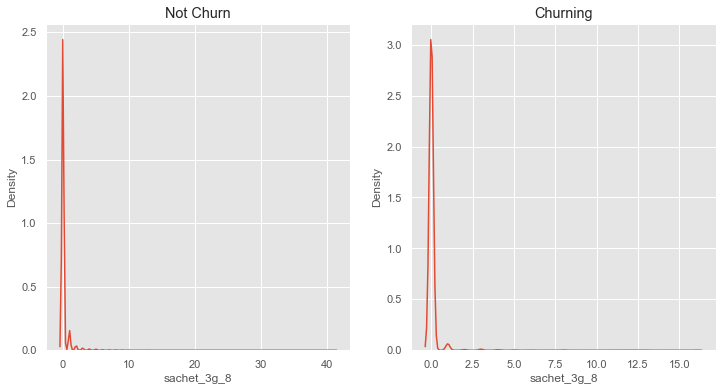

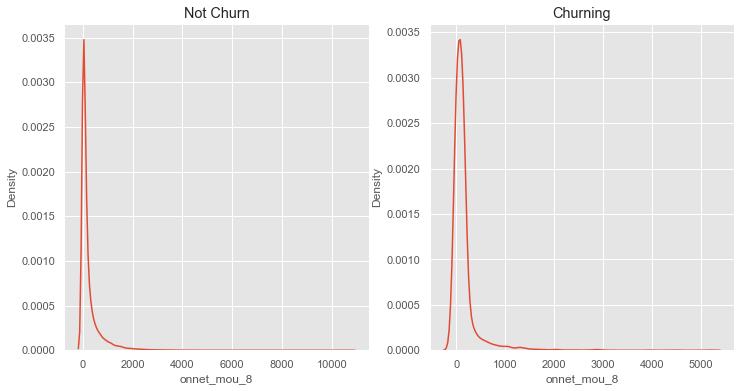

In [53]:
# we can use dist plot for analysing the numerical variables against the Target
for cols in ['aon','offnet_mou_8','night_pck_user_8','sachet_3g_8',
 'onnet_mou_8']:
    fig = plt.figure(figsize=(12,6)) # to control the figure size.
    plt1 = fig.add_subplot(1, 2, 1, title="Not Churn")
    plt2 = fig.add_subplot(1, 2, 2, title="Churning")
    #Using Seaborn distplot, plotting density distribution plot for the variables 
    sns.distplot(telecom_hvc_0[cols],ax=plt1,hist=None)
    sns.distplot(telecom_hvc_1[cols],ax=plt2,hist=None)
    
    plt.show() #function to show the plot

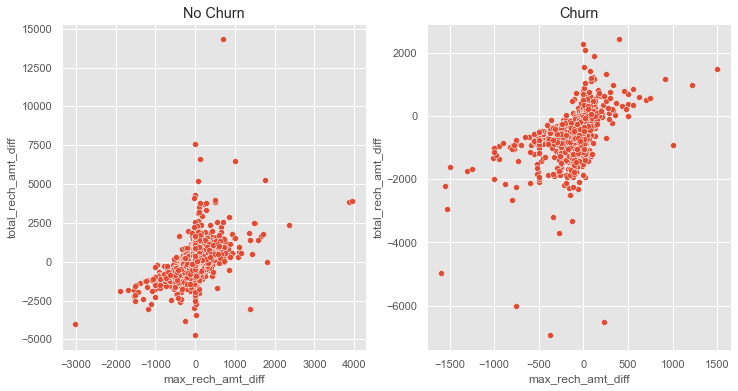

In [54]:
# we can use scatter plot for analysing the numerical variables
#for cols in ['av_rech_amt_6_7','total_og_mou_reduced','total_ic_mou_reduced','total_rech_amt_reduced',
#'vbc_reduced','total_arpu_reduced']:
fig = plt.figure(figsize=(12,6)) # to control the figure size.
plt1 = fig.add_subplot(1, 2, 1, title="No Churn")
plt2 = fig.add_subplot(1, 2, 2, title="Churn")
sns.scatterplot(telecom_hvc_0.max_rech_amt_diff,telecom_hvc_0.total_rech_amt_diff,ax=plt1)
sns.scatterplot(telecom_hvc_1.max_rech_amt_diff,telecom_hvc_1.total_rech_amt_diff,ax=plt2)
plt.show()

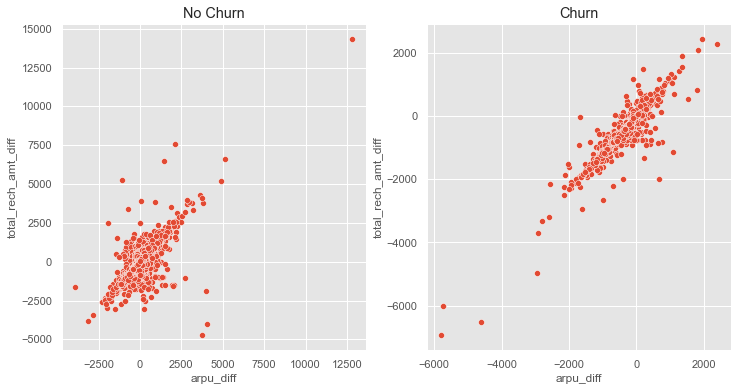

In [55]:
# we can use scatter plot for analysing the numerical variables
#for cols in ['av_rech_amt_6_7','total_og_mou_reduced','total_ic_mou_reduced','total_rech_amt_reduced',
#'vbc_reduced','total_arpu_reduced']:
fig = plt.figure(figsize=(12,6)) # to control the figure size.
plt1 = fig.add_subplot(1, 2, 1, title="No Churn")
plt2 = fig.add_subplot(1, 2, 2, title="Churn")
sns.scatterplot(telecom_hvc_0.arpu_diff,telecom_hvc_0.total_rech_amt_diff,ax=plt1)
sns.scatterplot(telecom_hvc_1.arpu_diff,telecom_hvc_1.total_rech_amt_diff,ax=plt2)
plt.show()

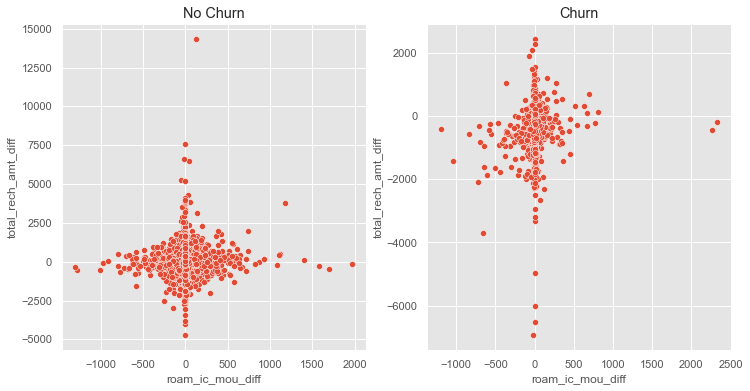

In [56]:
# we can use scatter plot for analysing the numerical variables
#for cols in ['av_rech_amt_6_7','total_og_mou_reduced','total_ic_mou_reduced','total_rech_amt_reduced',
#'vbc_reduced','total_arpu_reduced']:
fig = plt.figure(figsize=(12,6)) # to control the figure size.
plt1 = fig.add_subplot(1, 2, 1, title="No Churn")
plt2 = fig.add_subplot(1, 2, 2, title="Churn")
sns.scatterplot(telecom_hvc_0.roam_ic_mou_diff,telecom_hvc_0.total_rech_amt_diff,ax=plt1)
sns.scatterplot(telecom_hvc_1.roam_ic_mou_diff,telecom_hvc_1.total_rech_amt_diff,ax=plt2)
plt.show()

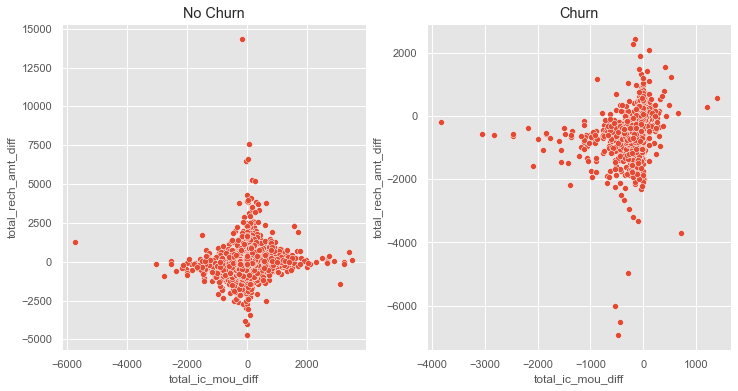

In [57]:
# we can use scatter plot for analysing the numerical variables
#for cols in ['av_rech_amt_6_7','total_og_mou_reduced','total_ic_mou_reduced','total_rech_amt_reduced',
#'vbc_reduced','total_arpu_reduced']:
fig = plt.figure(figsize=(12,6)) # to control the figure size.
plt1 = fig.add_subplot(1, 2, 1, title="No Churn")
plt2 = fig.add_subplot(1, 2, 2, title="Churn")
sns.scatterplot(telecom_hvc_0.total_ic_mou_diff,telecom_hvc_0.total_rech_amt_diff,ax=plt1)
sns.scatterplot(telecom_hvc_1.total_ic_mou_diff,telecom_hvc_1.total_rech_amt_diff,ax=plt2)
plt.show()

## Bivariate EDA

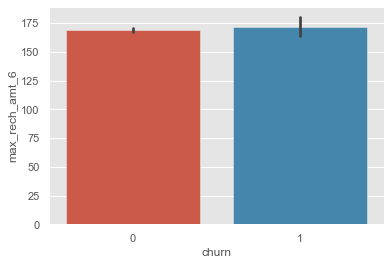

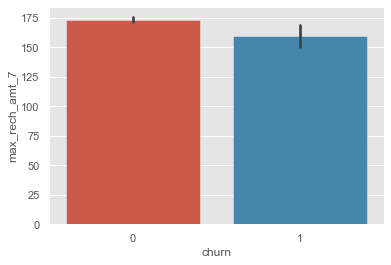

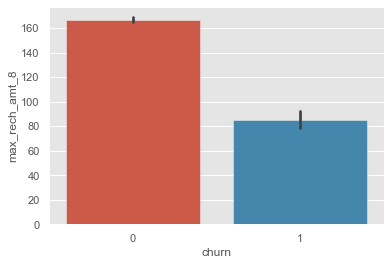

In [58]:
sns.barplot(telecom_hvc.churn, telecom_hvc.max_rech_amt_6)
plt.show() #to show the plots
sns.barplot(telecom_hvc.churn, telecom_hvc.max_rech_amt_7)
plt.show() #to show the plots
sns.barplot(telecom_hvc.churn, telecom_hvc.max_rech_amt_8)
plt.show() #to show the plots

**Bi-Variate Analysis using pairplots**

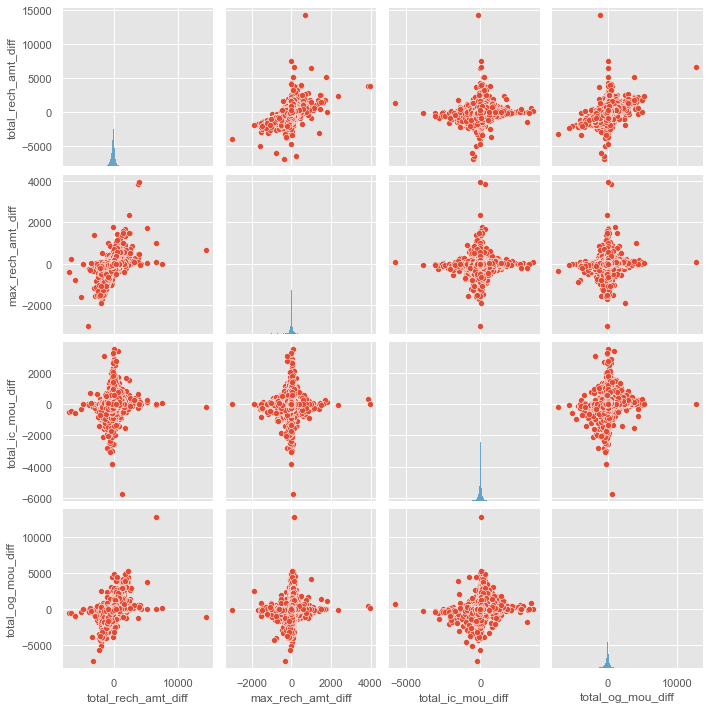

In [59]:
num_cols =[
'total_rech_amt_diff',
'max_rech_amt_diff',
'total_ic_mou_diff',
'total_og_mou_diff']
#using pairplot plotting all the continuous variable and idintifying the relationship amonng them.
sns.pairplot(telecom_hvc[num_cols])
plt.show() #to show the plots

**Observations so far from EDA**

* Target Feature - churn is highly imbalance

* There is an observable trend in the reduction of recharge amount and incoming/outgoing usages between the churn and non-churn customers.


### Data Cleaning - Outlier Treatment

In [60]:
#Defining a sigmatic function to cap the outlier Limits.
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [61]:
# cap outliers in the numeric columns

#Seggregating oncegain all the numerical features based on the unique counts ( > 30)
feature_split = pd.DataFrame(telecom_hvc.nunique())
feature_split.reset_index(inplace = True)
feature_split.columns = ['Feature','Unique count']
feature_split

numerical_columns = list(feature_split[feature_split['Unique count'] > 30]['Feature'])
numerical_columns = list(telecom_hvc[numerical_columns].select_dtypes(include = ['int64','float64']).columns)
numerical_columns

#Applying the singmatic function to cap the Outliers in the data
telecom_hvc[numerical_columns] = telecom_hvc[numerical_columns].apply(cap_outliers, axis=0)

**Observation**

* We have used our custom Sigmatic function to cap the outliers in the data

### Model Building

### Data Pre-Processing

In [62]:
#converting the Target Variable from category to Numeric
telecom_hvc['churn'] = pd.to_numeric(telecom_hvc['churn'])

### Train-Test Split

In [63]:
# divide data into train and test

# Putting feature variable to X
X = telecom_hvc.drop("churn", axis = 1)

# storing the target feature to the the y variable
y = telecom_hvc.churn

#Performing a Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [64]:
# print shapes of train and test sets
X_train.shape

(22500, 174)

In [65]:
y_train.shape

(22500,)

In [66]:
X_test.shape

(7501, 174)

In [67]:
y_test.shape

(7501,)

### Dealing with Data Imbalance

To deal with the data imbalance , we are going to use SMOTE technique.

We are creating synthetic samples by doing upsampling using **SMOTE(Synthetic Minority Oversampling Technique)**.

In [68]:
# Imporing SMOTE from imblearn module
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

### Scaling the Train Data Set Using StandardScalar()

In [69]:
# Standardization method

# Instantiate the Scaler
scaler = StandardScaler()
# List of the numeric columns
cols_to_scale = X_train[numerical_columns].columns.to_list()

# Fit the data into scaler and transform
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


In [70]:
#Printing the train dataset
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,-0.948191,-1.416248,-0.486337,-0.685536,-0.664864,-0.599009,-0.883707,-0.849080,-0.742008,-0.325152,-0.324144,-0.347534,-0.348360,-0.377689,-0.385932,-0.523376,-0.509864,-0.505110,-0.741472,-0.726306,-0.692040,-0.403353,-0.395246,-0.408271,-0.389677,-0.360521,-0.349125,-0.749573,-0.737752,-0.701952,-0.539446,-0.522640,-0.445085,-0.590722,-0.550433,-0.483632,-0.233901,-0.231452,-0.236753,0.0,0.0,0.0,-0.721420,-0.686907,-0.572682,-0.151864,-0.150926,-0.138438,-0.245026,-0.511057,1.047566,-0.424574,-0.052915,-0.031152,-0.950572,-0.898975,-0.652519,-0.582790,-0.580708,-0.577764,-0.607936,-0.690178,-0.722092,-0.446187,-0.430254,-0.470132,-0.688347,-0.742412,-0.758686,0.161260,-0.373322,0.855664,-0.525819,-0.401957,-0.456689,-0.261757,-0.264342,-0.271710,0.0,0.0,0.0,-0.332318,-0.471361,-0.013336,-0.684700,-0.743484,-0.513005,-0.474201,-0.2473,-0.322422,-0.283232,-0.273233,-0.272421,-0.227608,-0.229675,-0.217241,-0.794447,-1.412675,-0.627334,-0.941875,-1.366182,-0.439622,0.322375,-1.130352,0.640031,1.061588,-0.853155,-0.466453,1.049456,-0.633780,0.511615,1.377102,-0.664028,1.758498,0.0,-1.0,0.0,0.795190,-0.67796,0.978758,4.527357,-0.424425,5.715871,-0.458918,-0.437002,-0.377745,0.0,-1.0,0.0,1,0,1,0.989348,-0.475382,0.225435,0,0,0,0,0,0,1.0,-1.0,1.0,-0.491901,-0.373704,-0.416278,-0.425549,0.756619,0.290997,0.389313,0.031041,0.032387,0.206256,0.370894,0.080414,1.40659

#### Scaling the Test-Data Set Using the StandardScalar()

In [71]:
# Transform the test set
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

#Printing the test dataset
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
16575,0.0,0.0,0.0,1.323194,0.138069,0.760372,-0.695025,-0.644540,-0.599009,-0.892993,-0.586642,-0.788852,-0.325152,-0.324144,-0.347534,-0.348360,-0.377689,-0.385932,-0.526445,-0.440726,-0.505110,-0.746899,-0.077855,-0.692040,-0.403353,-0.395246,-0.408271,-0.389677,-0.360521,-0.349125,-0.754487,-0.282165,-0.701952,-0.549181,-0.522640,-0.445085,-0.590722,-0.550433,-0.483632,-0.233901,-0.231452,-0.236753,0.0,0.0,0.0,-0.727259,-0.686907,-0.572682,-0.151864,-0.150926,-0.138438,-0.549352,-0.524367,-0.475716,-0.424574,-0.052915,-0.031152,-0.962255,-0.719476,-0.680617,-0.626242,-0.483251,-0.607173,-0.809559,0.831173,-0.737244,-0.446187,-0.420110,-0.462378,-0.840944,0.311744,-0.778562,-0.419626,-0.396699,-0.379877,-0.537550,-0.492901,-0.462870,-0.261757,-0.264342,-0.27171,0.0,0.0,0.0,-0.584164,-0.542703,-0.508997,-0.876132,0.096034,-0.648181,-0.474201,-0.247300,-0.322422,-0.283232,-0.273233,-0.272421,-0.227608,-0.229675,-0.217241,-0.673568,-0.156713,-0.627334,1.255960,0.112184,0.756478,0.741627,0.754991,1.066519,1.605608,-0.853155,2.010273,1.904041,1.885195,1.020181,1.942859,2.020820,2.385559,6.0,6.0,3.0,3.884889,4.062027,4.456742,-0.371022,-0.185753,-0.151116,4.558783,4.686483,4.672290,0.0,0.0,0.0,0,0,0,-0.488512,-0.475382,-0.383629,6,6,3,0,0,0,1.0,1.0,1.0,-0.524391,5.099722,4.667413,4.563405,0.032381,0.283765,0.172202,0.031041,0.032387,-0.169596,0.375026,0.080414,0.128013,0.35537

# Model with PCA

### 1. PCA Model for Better Prediction

In [72]:
#Import PCA Libraries
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(random_state=42)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [73]:
# Printing all the Principal components PCs
pca.components_

array([[-5.00755080e-03, -5.00755080e-03, -5.00755080e-03, ...,
        -2.73362648e-02, -1.86723467e-02, -1.87810202e-02],
       [ 2.18410885e-03,  2.18410885e-03,  2.18410885e-03, ...,
         6.44519594e-02,  4.90837817e-02,  4.03660809e-02],
       [ 1.12453192e-03,  1.12453192e-03,  1.12453192e-03, ...,
         1.04307048e-01,  4.41543941e-02,  7.67238917e-02],
       ...,
       [ 0.00000000e+00,  6.32451637e-02, -6.32451637e-02, ...,
        -3.81639165e-17, -9.02056208e-17, -9.54097912e-17],
       [-0.00000000e+00,  8.48884155e-02, -8.48884155e-02, ...,
        -6.93889390e-17, -1.16226473e-16, -4.25007252e-17],
       [ 8.16454834e-01, -4.15115928e-01, -4.01338906e-01, ...,
        -2.94902991e-17,  4.46691295e-17, -1.11672824e-17]])

In [74]:
# Cumuliative varinace of the PCs explained here
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11163046 0.21707961 0.2771968  0.32628794 0.36970885 0.4048887
 0.43524075 0.46274821 0.48808442 0.51229449 0.53247238 0.55216246
 0.57061524 0.58757376 0.60414673 0.61955979 0.63376089 0.64736003
 0.66035594 0.67311176 0.68516273 0.69658717 0.70798705 0.71836241
 0.72836328 0.73812597 0.74750259 0.75637587 0.76477033 0.77298764
 0.78115742 0.78926484 0.79689507 0.80434223 0.81130968 0.81816229
 0.82473072 0.83114694 0.83721045 0.84292796 0.84852425 0.85387015
 0.85907081 0.86401475 0.86882477 0.87343757 0.87778899 0.8819676
 0.88604623 0.88993694 0.89377511 0.89752968 0.90102228 0.90448689
 0.90782879 0.91116145 0.91435894 0.91752047 0.92061767 0.92365721
 0.9266308  0.92924154 0.93176867 0.93427018 0.93668767 0.93906531
 0.94133742 0.94356058 0.94573857 0.94788072 0.94996868 0.95196105
 0.95394289 0.95589485 0.95779701 0.95963083 0.96141722 0.96316487
 0.96477786 0.96632948 0.96783412 0.96931954 0.97077334 0.97218728
 0.97352765 0.97485321 0.97611861 0.97734638 0.9785055  0.979579

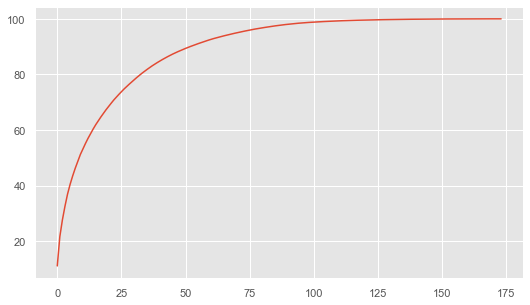

In [75]:
# plot feature variance using Scree Plot
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

**We can see that `60 components` explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.**

#### Implementing Incremental PCA for 60 Features

In [76]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [77]:
#Apply pca and Transform the test data set
X_test_pca = pca_final.transform(X_test)

#### Model Evaluation Metrics: Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## (1) Logistic regression with PCA

In [78]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [79]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [80]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.220197,0.013257,0.009949,0.002118,0.01,{'C': 0.01},0.842391,0.829736,0.828319,0.828578,0.836608,0.833126,0.005536,1,0.834126,0.833736,0.832716,0.834392,0.833586,0.833711,0.000573
1,0.224828,0.009632,0.009806,0.001891,0.1,{'C': 0.1},0.842144,0.829736,0.827841,0.828578,0.835889,0.832838,0.005453,6,0.834607,0.833676,0.832474,0.834815,0.834010,0.833916,0.000829
2,0.227701,0.020940,0.009673,0.002093,1,{'C': 1},0.842144,0.829978,0.827841,0.828820,0.835649,0.832887,0.005363,2,0.834547,0.833615,0.832595,0.834936,0.834132,0.833965,0.000813
3,0.209047,0.015639,0.010632,0.002795,10,{'C': 10},0.842144,0.829978,0.827841,0.828820,0.835649,0.832887,0.005363,2,0.834547,0.833615,0.832595,0.834936,0.834132,0.833965,0.000813
4,0.202931,0.026252,0.009179,0.001429,100,{'C': 100},0.842144,0.829978,0.827841,0.828820,0.835649,0.832887,0.005363,2,0.834547,0.833615,0.832595,0.834876,0.834071,0.833941,0.000797
5,0.215036,0.012591,0.012409,0.002688,1000,{'C': 1000},0.842144,0.829978,0.827841,0.828820,0.835649,0.832887,0.005363,2,0.834547,0.833615,0.832595,0.834876,0.834071,0.833941,0.000797


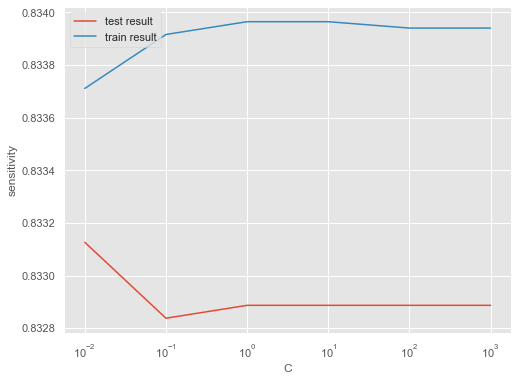

In [81]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [82]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8331263695324672 at C = 0.01


In [83]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [84]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Prediction on the train data set

In [85]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

**Confusion matrix**

In [86]:
# Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16941  3728]
 [ 3430 17239]]


In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8268421307271759
Sensitivity:- 0.8340509942425856
Specificity:- 0.8196332672117664


##### Prediction on the test set

In [89]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5589 1302]
 [ 102  508]]


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8128249566724437
Sensitivity:- 0.8327868852459016
Specificity:- 0.8110579016107967


***Model summary***

- Train set
    - Accuracy = 0.82
    - Sensitivity = 0.83
    - Specificity = 0.81
- Test set
    - Accuracy = 0.81
    - Sensitivity = 0.83
    - Specificity = 0.81
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## (2) - Support Vector Machine(SVM) with PCA

In [93]:
# Importing SVC Modules
from sklearn.svm import SVC

In [94]:
from sklearn import svm 
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      6891
           1       0.39      0.74      0.51       610

    accuracy                           0.88      7501
   macro avg       0.68      0.82      0.72      7501
weighted avg       0.93      0.88      0.90      7501

Accuracy for the test dataset 88.3%
ROC for the test dataset 81.8%


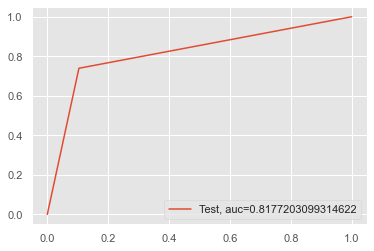

In [95]:

#Predicitng on the Test data
preds_SVM_lin = svm_linear.predict(X_test)
#preds_SVM_lin_probs = svm_linear.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_lin))
accuracy = accuracy_score(y_test, preds_SVM_lin)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_SVM_lin)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

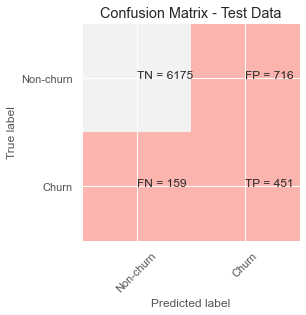

In [96]:
#plotting the confusion matrix predictions
cm = confusion_matrix(y_test, preds_SVM_lin)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

#### SVM with non linear kernel :

In [97]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6891
           1       0.46      0.66      0.55       610

    accuracy                           0.91      7501
   macro avg       0.72      0.80      0.75      7501
weighted avg       0.93      0.91      0.92      7501

Accuracy for the test dataset 91.0%
ROC for the test dataset 79.8%


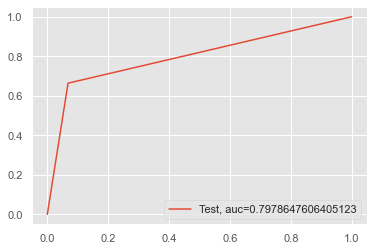

In [98]:
preds_SVM_rbf = svm_rbf.predict(X_test)
#preds_SVM_rbf_probs = svm_rbf.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_rbf))
accuracy = accuracy_score(y_test, preds_SVM_rbf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_SVM_rbf)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

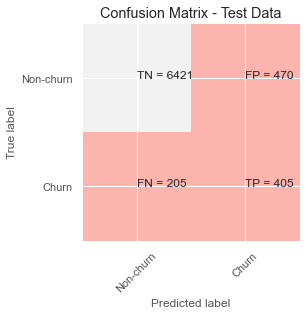

In [99]:
cm = confusion_matrix(y_test, preds_SVM_rbf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

## (3) Random Forest with PCA

In [100]:
#Hyper-Paramter Tuning
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, #Randomforest estimator
                           param_grid = param_grid, #Hyperparamters
                           cv = 3, # 3 k-folds
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [101]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8315836313457795 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


##### Model with optimal hyperparameters

In [102]:
# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [103]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [104]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[17703  2966]
 [ 3860 16809]]


In [105]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8348734820262228
Sensitivity:- 0.8132468914799942
Specificity:- 0.8565000725724515


##### Prediction on the test set

In [106]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [107]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5856 1035]
 [ 152  458]]


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.841754432742301
Sensitivity:- 0.7508196721311475
Specificity:- 0.8498040922942969


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.86
- Test set
    - Accuracy = 0.84
    - Sensitivity = 0.76
    - Specificity = 0.85
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## (4) Decision tree with PCA

In [110]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [111]:
##Hyperparameter Tuning
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [112]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.296755,0.144134,0.009659,0.007889,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.798258,0.774794,0.785196,0.792403,0.831640,0.796458,0.019254,5
1,3.328726,0.122566,0.015497,0.000498,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.798258,0.774794,0.785196,0.792403,0.831640,0.796458,0.019254,5
2,3.328905,0.121205,0.015911,0.000657,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.795114,0.773585,0.781567,0.789499,0.822932,0.792539,0.016848,7
3,3.307870,0.123370,0.012503,0.005765,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.795114,0.773585,0.781567,0.789499,0.822932,0.792539,0.016848,7
4,1.995299,0.177486,0.006396,0.007837,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.831398,0.848331,0.839865,0.854101,0.852927,0.845324,0.008575,1
5,1.962871,0.072638,0.000000,0.000000,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.831398,0.848331,0.838413,0.854101,0.852927,0.845034,0.008777,2
6,1.841816,0.115030,0.006381,0.007835,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.811563,0.834785,0.829705,0.836438,0.825109,0.827520,0.008917,3
7,1.735222,0.097991,0.003110,0.006220,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.811563,0.834301,0.829705,0.836438,0.824867,0.827375,0.008853,4


In [113]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8453243396776579
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [114]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [115]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [116]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17432  3237]
 [ 2498 18171]]


In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8612656635541148
Sensitivity:- 0.8791426774396439
Specificity:- 0.8433886496685858


##### Prediction on the test set

In [119]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [120]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5621 1270]
 [ 164  446]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8088254899346754
Sensitivity:- 0.7311475409836066
Specificity:- 0.8157016398200552


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.88
    - Specificity = 0.84
- Test set
    - Accuracy = 0.81
    - Sensitivity = 0.73
    - Specificity = 0.82
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Summary for PCA Models

After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic **Logistic regression or the SVM models** preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

## Logistic regression with No PCA

In [123]:
##### Importing stats model
import statsmodels.api as sm

In [124]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [125]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [126]:
# Summary of base model
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41168
Model Family:                Binomial   Df Model:                          169
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10932.
Date:                Tue, 13 Dec 2022   Deviance:                       21864.
Time:                        20:04:15   Pearson chi2:                 6.18e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.7573      0.131     13.440      0.000       1.501       2.014
loc_og_t2o_mou           -0.1271      0.090     -1.417      0.156      -0.303       0.049
std_og_t2o_mou           -0.1271      0.090     -1.417      0.156      -0.303       0.049
loc_ic_t2o_mou           -0.1271      0.090     -1.417      0.156      -0.303       0.049
arpu_6                    0.1122      0.129      0.870      0.384      -0.141       0.365
arpu_7                    0.0565      0.119      0.476      0.634      -0.176       0.289
arpu_8                    0.4628      0.213      2.175      0.030       0.046       0.880
onnet_mou_6               0.0023      0.163      0.014      0.989      -0.317       0.321
onnet_mou_7               0.4365      0.161      2.711      0.007       0.121       0.752
onnet_mou_8              -0.1217      0.169     -0.721      0.471      -0.452       0.209
offnet_mou_6              0.2405      0.157      1.528      0.127      -0.068       0.549
offnet_mou_7              0.5130      0.170      3.020      0.003       0.180       0.846
offnet_mou_8             -0.9454      0.162     -5.845      0.000      -1.262      -0.628
roam_ic_mou_6            -0.1052      0.048     -2.196      0.028      -0.199      -0.011
roam_ic_mou_7             0.1143      0.046      2.490      0.013       0.024       0.204
roam_ic_mou_8             0.0364      0.057      0.644      0.520      -0.074       0.147
roam_og_mou_6            -0.0376      0.050     -0.758      0.449      -0.135       0.060
roam_og_mou_7            -0.0103      0.046     -0.221      0.825      -0.101       0.081
roam_og_mou_8             0.2666      0.054      4.936      0.000       0.161       0.372
loc_og_t2t_mou_6          0.2225      0.097      2.295      0.022       0.032       0.412
loc_og_t2t_mou_7         -0.0192      0.101     -0.190      0.849      -0.217       0.178
loc_og_t2t_mou_8         -0.5241      0.124     -4.217      0.000      -0.768      -0.280
loc_og_t2m_mou_6          0.1684      0.128      1.311      0.190      -0.083       0.420
loc_og_t2m_mou_7          0.0626      0.142      0.441      0.659      -0.216       0.341
loc_og_t2m_mou_8         -0.6196      0.172     -3.593      0.000      -0.958      -0.282
loc_og_t2f_mou_6         -0.0208      0.036     -0.580      0.562      -0.091       0.049
loc_og_t2f_mou_7         -0.1634      0.040     -4.118      0.000      -0.241      -0.086
loc_og_t2f_mou_8          0.1248      0.036      3.477      0.001       0.054       0.195
loc_og_t2c_mou_6         -0.0062      0.022     -0.277      0.781      -0.050       0.038
loc_og_t2c_mou_7         -0.0489      0.025     -1.966      0.049      -0.098      -0.000
loc_og_t2c_mou_8         -0.0057      0.024     -0.235      0.815      -0.053       0.042
loc_og_mou_6           

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

**Coarse tuning (Auto+Manual)**

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [127]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [128]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE
rfe = RFE(logreg, step =15,)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [129]:
rfe

RFE(estimator=LogisticRegression(), step=15)

In [130]:
## Channeling the output of RFE to understand which columns are selected by the model based on the rfe ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) #typecasting to list

[('loc_og_t2o_mou', False, 2),
 ('std_og_t2o_mou', False, 2),
 ('loc_ic_t2o_mou', False, 2),
 ('arpu_6', False, 5),
 ('arpu_7', False, 6),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 7),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 3),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 4),
 ('roam_ic_mou_7', False, 3),
 ('roam_ic_mou_8', False, 7),
 ('roam_og_mou_6', False, 6),
 ('roam_og_mou_7', False, 7),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 5),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 7),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 6),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 2),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 6),
 ('loc_og_t2c_mou_8', False, 7),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_

In [131]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_8', 'isd_og_mou_8',
       'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_mou_7', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'total_rech_num_6', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'count_rech_3g_6', 'count_rech_3g_7',
      

### Model-1 with RFE selected columns

In [132]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41252
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11092.
Date:                Tue, 13 Dec 2022   Deviance:                       22184.
Time:                        20:04:25   Pearson chi2:                 1.57e+09
No. Iterations:                    74                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8842      0.123     15.346      0.000       1.644       2.125
arpu_8                    0.6930      0.059     11.696      0.000       0.577       0.809
onnet_mou_7               0.4299      0.105      4.112      0.000       0.225       0.635
onnet_mou_8              -0.1311      0.131     -1.004      0.315      -0.387       0.125
offnet_mou_7              0.5372      0.095      5.628      0.000       0.350       0.724
offnet_mou_8             -0.8307      0.075    -11.079      0.000      -0.978      -0.684
roam_og_mou_8             0.2769      0.026     10.663      0.000       0.226       0.328
loc_og_t2t_mou_6          0.2126      0.080      2.670      0.008       0.056       0.369
loc_og_t2t_mou_8         -0.6372      0.104     -6.106      0.000      -0.842      -0.433
loc_og_t2m_mou_6          0.2334      0.105      2.222      0.026       0.028       0.439
loc_og_t2m_mou_8         -0.7607      0.141     -5.403      0.000      -1.037      -0.485
loc_og_t2f_mou_7         -0.0952      0.025     -3.800      0.000      -0.144      -0.046
loc_og_mou_6             -0.5087      0.171     -2.967      0.003      -0.845      -0.173
loc_og_mou_7             -0.4429      0.078     -5.668      0.000      -0.596      -0.290
loc_og_mou_8              1.5653      0.240      6.512      0.000       1.094       2.036
std_og_t2t_mou_7         -0.5220      0.092     -5.686      0.000      -0.702      -0.342
std_og_t2t_mou_8         -0.3021      0.114     -2.656      0.008      -0.525      -0.079
std_og_t2m_mou_7         -0.2882      0.082     -3.524      0.000      -0.448      -0.128
std_og_t2c_mou_7          0.1882      0.096      1.970      0.049       0.001       0.375
std_og_t2c_mou_8         -2.1195      0.101    -20.944      0.000      -2.318      -1.921
std_og_mou_6              0.5177      0.170      3.048      0.002       0.185       0.851
std_og_mou_8              1.0929      0.219      4.994      0.000       0.664       1.522
isd_og_mou_8             -0.0861      0.025     -3.439      0.001      -0.135      -0.037
total_og_mou_6           -0.6600      0.187     -3.524      0.000      -1.027      -0.293
total_og_mou_8           -0.6596      0.225     -2.930      0.003      -1.101      -0.218
loc_ic_t2t_mou_6          0.2161      0.063      3.437      0.001       0.093       0.339
loc_ic_t2t_mou_8         -0.4096      0.093     -4.418      0.000      -0.591      -0.228
loc_ic_t2m_mou_6          0.4342      0.110      3.942      0.000       0.218       0.650
loc_ic_t2m_mou_7          0.1937      0.084      2.301      0.021       0.029       0.359
loc_ic_t2m_mou_8         -0.7643      0.164     -4.661      0.000      -1.086      -0.443
loc_ic_t2f_mou_8         -0.1347      0.039     -3.455      0.001      -0.211      -0.058
loc_ic_mou_6           

#### Checking VIFs

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# simplefunction to calculate the vif or the variance infaltion factor among the features
def vifdeductor(inp_df):
    vif = pd.DataFrame()
    vif['features'] = inp_df.columns #loading all the column values
    vif['VIF'] = [variance_inflation_factor(inp_df.values, i) for i in range(inp_df.shape[1])] #VIF calcualtion
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [135]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_1)

,features,VIF
18,std_og_t2c_mou_7,inf
19,std_og_t2c_mou_8,inf
35,std_ic_t2o_mou_7,inf
36,std_ic_t2o_mou_8,inf
50,count_rech_3g_8,114.99
24,total_og_mou_8,114.30
21,std_og_mou_8,98.00
23,total_og_mou_6,93.37
78,total_og_mou_diff,86.56
14,loc_og_mou_8,86.50


In [136]:
rfe_columns= rfe_cols.to_list()

In [137]:
rfe_columns.remove('std_og_t2c_mou_7')

In [138]:
X_train[rfe_columns]

,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_8,isd_og_mou_8,total_og_mou_6,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_7,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_7,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_6,total_rech_num_6,total_rech_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_8,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,onnet_mou_diff,std_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff
0,-0.486337,-0.664864,-0.599009,-0.849080,-0.742008,-0.385932,-0.523376,-0.505110,-0.741472,-0.692040,-0.395246,-0.749573,-0.737752,-0.701952,-0.522640,-0.445085,-0.550433,0.0,-0.721420,-0.572682,-0.138438,-0.950572,-0.652519,-0.582790,-0.577764,-0.607936,-0.690178,-0.722092,-0.470132,-0.688347,-0.742412,-0.758686,-0.401957,0.0,0.0,-0.471361,-0.743484,-0.513005,-0.322422,-0.283232,-0.794447,-1.366182,-0.466453,1.049456,-0.633780,0.511615,0.000000,-1.000000,0.000000,0.795190,0.978758,-0.424425,-0.458918,-0.437002,0.000000,-1.000000,0.000000,1,0,1,0.989348,-0.475382,0.225435,0,0,0,0,0,0,1.000000,-1.000000,1.000000,-0.491901,-0.373704,0.290997,0.370894,0.491692,0.035122,0.539120,0.643363,0.781735,1.257268,0.289928,1.742982,1.074770,4.531614
1,-0.804327,-0.636267,-0.599009,-0.821721,-0.674500,-0.385932,-0.484845,-0.505110,-0.646945,-0.528862,-0.395246,-0.668551,-0.684079,-0.594103,-0.522640,-0.445085,-0.529956,0.0,-0.691767,-0.543941,-0.138438,-0.896911,-0.612025,-0.407859,-0.469174,-0.349819,-0.562576,-0.643978,-0.412947,-0.430044,-0.656014,-0.661648,0.209294,0.0,0.0,-0.048826,-0.515550,0.415347,-0.322422,0.661914,-0.915325,-1.121272,-0.645621,0.194872,0.205878,0.511615,2.000000,2.000000,2.000000,2.454296,3.013890,-0.123954,2.905094,2.822096,0.000000,0.000000,0.000000,0,0,0,-0.488512,-0.475382,-0.383629,2,2,2,0,0,0,1.000000,1.000000,1.000000,-0.806356,3.280070,0.268191,0.370604,0.478841,-0.108054,2.454445,0.795088,0.335358,-0.574690,0.289928,0.262324,0.287558,0.193553
2,-0.903113,1.049490,-0.561037,-0.657232,-0.781277,-0.142301,0.122526,-0.505110,-0.351774,-0.692040,-0.395246,-0.214971,-0.419334,-0.701952,1.257127,-0.445085,-0.455425,0.0,0.461342,-0.572682,-0.138438,0.308081,-0.680617,-0.199435,-0.607173,-0.425428,-0.490993,-0.776448,-0.470132,-0.423816,-0.490418,-0.805910,0.109758,0.0,0.0,1.637632,0.019035,-0.669754,-0.322422,-0.283232,-0.431812,0.116637,-0.645621,-0.659713,-0.633780,-0.505516,-1.000000,-1.000000,-1.000000,-0.713088,-0.535267,-0.424425,-0.458918,-0.437002,-1.000000,-1.000000,-1.000000,0,0,0,-0.488512,-0.475382,-0.383629,0,0,0,0,0,0,-1.000000,-1.000000,-1.000000,-0.842327,-0.373704,-2.165621,-1.216462,-1.079663,-0.468182,-3.591450,-0.191128,-1.125733,-0.955960,0.289928,0.262324,0.287558,0.229821
3,0.144028,-0.569040,-0.521870,1.132364,1.244308,-0.385932,-0.520648,-0.505110,-0.705176,-0.500082,-0.395246,-0.724709,-0.617960,-0.576791,-0.413710,-0.353839,1.729286,0.0,0.150837,0.956541,-0.138438,-0.169845,0.582383,-0.616406,-0.581581,-0.783178,-0.704371,-0.601831,-0.453170,-0.819456,-0.760434,-0.676841,0.297723,0.0,0.0,0.004256,-0.565849,-0.296487,-0.322422,-0.093379,3.194534,0.025352,-0.550767,-0.232420,-0.633780,-0.505516,0.000000,-1.000000,-1.000000,-0.6

### Model-2
Building the model after removing std_og_t2c_mou_7 variable.

In [139]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41252
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11092.
Date:                Tue, 13 Dec 2022   Deviance:                       22184.
Time:                        20:04:39   Pearson chi2:                 1.57e+09
No. Iterations:                    18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8842      0.123     15.346      0.000       1.644       2.125
arpu_8                    0.6930      0.059     11.696      0.000       0.577       0.809
onnet_mou_7               0.4299      0.105      4.112      0.000       0.225       0.635
onnet_mou_8              -0.1311      0.131     -1.004      0.315      -0.387       0.125
offnet_mou_7              0.5372      0.095      5.628      0.000       0.350       0.724
offnet_mou_8             -0.8307      0.075    -11.079      0.000      -0.978      -0.684
roam_og_mou_8             0.2769      0.026     10.663      0.000       0.226       0.328
loc_og_t2t_mou_6          0.2126      0.080      2.670      0.008       0.056       0.369
loc_og_t2t_mou_8         -0.6372      0.104     -6.106      0.000      -0.842      -0.433
loc_og_t2m_mou_6          0.2334      0.105      2.222      0.026       0.028       0.439
loc_og_t2m_mou_8         -0.7607      0.141     -5.403      0.000      -1.037      -0.485
loc_og_t2f_mou_7         -0.0952      0.025     -3.800      0.000      -0.144      -0.046
loc_og_mou_6             -0.5087      0.171     -2.967      0.003      -0.845      -0.173
loc_og_mou_7             -0.4429      0.078     -5.668      0.000      -0.596      -0.290
loc_og_mou_8              1.5653      0.240      6.512      0.000       1.094       2.036
std_og_t2t_mou_7         -0.5220      0.092     -5.686      0.000      -0.702      -0.342
std_og_t2t_mou_8         -0.3021      0.114     -2.656      0.008      -0.525      -0.079
std_og_t2m_mou_7         -0.2882      0.082     -3.524      0.000      -0.448      -0.128
std_og_t2c_mou_8         -2.1195      0.101    -20.944      0.000      -2.318      -1.921
std_og_mou_6              0.5177      0.170      3.048      0.002       0.185       0.851
std_og_mou_8              1.0929      0.219      4.994      0.000       0.664       1.522
isd_og_mou_8             -0.0861      0.025     -3.439      0.001      -0.135      -0.037
total_og_mou_6           -0.6600      0.187     -3.524      0.000      -1.027      -0.293
total_og_mou_8           -0.6596      0.225     -2.930      0.003      -1.101      -0.218
loc_ic_t2t_mou_6          0.2161      0.063      3.437      0.001       0.093       0.339
loc_ic_t2t_mou_8         -0.4096      0.093     -4.418      0.000      -0.591      -0.228
loc_ic_t2m_mou_6          0.4342      0.110      3.942      0.000       0.218       0.650
loc_ic_t2m_mou_7          0.1937      0.084      2.301      0.021       0.029       0.359
loc_ic_t2m_mou_8         -0.7643      0.164     -4.661      0.000      -1.086      -0.443
loc_ic_t2f_mou_8         -0.1347      0.039     -3.455      0.001      -0.211      -0.058
loc_ic_mou_6             -0.7649      0.145     -5.278      0.000      -1.049      -0.481
loc_ic_mou_7           

In [140]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_2)

,features,VIF
35,std_ic_t2o_mou_8,inf
18,std_og_t2c_mou_8,inf
49,count_rech_3g_8,114.99
23,total_og_mou_8,114.30
20,std_og_mou_8,98.00
22,total_og_mou_6,93.37
77,total_og_mou_diff,86.56
14,loc_og_mou_8,86.50
32,loc_ic_mou_8,84.72
48,count_rech_3g_7,84.20


In [141]:
#high p-value
rfe_columns.remove('std_ic_mou_7')

### Model Tuning

We will continue with the steps of checking the VIF and p-values and fine tune the model building process.

In [142]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41253
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11092.
Date:                Tue, 13 Dec 2022   Deviance:                       22184.
Time:                        20:04:54   Pearson chi2:                 1.57e+09
No. Iterations:                    40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8852      0.123     15.360      0.000       1.645       2.126
arpu_8                    0.6928      0.059     11.697      0.000       0.577       0.809
onnet_mou_7               0.4302      0.105      4.116      0.000       0.225       0.635
onnet_mou_8              -0.1310      0.131     -1.003      0.316      -0.387       0.125
offnet_mou_7              0.5373      0.095      5.628      0.000       0.350       0.724
offnet_mou_8             -0.8306      0.075    -11.078      0.000      -0.978      -0.684
roam_og_mou_8             0.2767      0.026     10.660      0.000       0.226       0.328
loc_og_t2t_mou_6          0.2125      0.080      2.669      0.008       0.056       0.369
loc_og_t2t_mou_8         -0.6375      0.104     -6.110      0.000      -0.842      -0.433
loc_og_t2m_mou_6          0.2334      0.105      2.221      0.026       0.027       0.439
loc_og_t2m_mou_8         -0.7606      0.141     -5.402      0.000      -1.037      -0.485
loc_og_t2f_mou_7         -0.0955      0.025     -3.813      0.000      -0.145      -0.046
loc_og_mou_6             -0.5083      0.171     -2.964      0.003      -0.844      -0.172
loc_og_mou_7             -0.4430      0.078     -5.667      0.000      -0.596      -0.290
loc_og_mou_8              1.5655      0.240      6.512      0.000       1.094       2.037
std_og_t2t_mou_7         -0.5229      0.092     -5.700      0.000      -0.703      -0.343
std_og_t2t_mou_8         -0.3022      0.114     -2.656      0.008      -0.525      -0.079
std_og_t2m_mou_7         -0.2879      0.082     -3.521      0.000      -0.448      -0.128
std_og_t2c_mou_8         -2.1179      0.101    -20.954      0.000      -2.316      -1.920
std_og_mou_6              0.5188      0.170      3.055      0.002       0.186       0.852
std_og_mou_8              1.0923      0.219      4.991      0.000       0.663       1.521
isd_og_mou_8             -0.0859      0.025     -3.432      0.001      -0.135      -0.037
total_og_mou_6           -0.6603      0.187     -3.526      0.000      -1.027      -0.293
total_og_mou_8           -0.6596      0.225     -2.930      0.003      -1.101      -0.218
loc_ic_t2t_mou_6          0.2164      0.063      3.443      0.001       0.093       0.340
loc_ic_t2t_mou_8         -0.4111      0.093     -4.444      0.000      -0.592      -0.230
loc_ic_t2m_mou_6          0.4346      0.110      3.945      0.000       0.219       0.650
loc_ic_t2m_mou_7          0.1942      0.084      2.309      0.021       0.029       0.359
loc_ic_t2m_mou_8         -0.7674      0.164     -4.691      0.000      -1.088      -0.447
loc_ic_t2f_mou_8         -0.1351      0.039     -3.467      0.001      -0.212      -0.059
loc_ic_mou_6             -0.7647      0.145     -5.278      0.000      -1.049      -0.481
loc_ic_mou_7           

In [143]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_3)

,features,VIF
35,std_ic_t2o_mou_8,inf
18,std_og_t2c_mou_8,inf
48,count_rech_3g_8,114.97
23,total_og_mou_8,114.27
20,std_og_mou_8,97.97
22,total_og_mou_6,93.37
76,total_og_mou_diff,86.54
14,loc_og_mou_8,86.49
47,count_rech_3g_7,84.19
32,loc_ic_mou_8,83.89


In [144]:
#high p-value
rfe_columns.remove('onnet_mou_8')

In [145]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41254
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11093.
Date:                Tue, 13 Dec 2022   Deviance:                       22185.
Time:                        20:05:08   Pearson chi2:                 1.49e+09
No. Iterations:                    31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8855      0.123     15.359      0.000       1.645       2.126
arpu_8                    0.6884      0.059     11.656      0.000       0.573       0.804
onnet_mou_7               0.3848      0.095      4.067      0.000       0.199       0.570
offnet_mou_7              0.5288      0.095      5.564      0.000       0.343       0.715
offnet_mou_8             -0.8138      0.073    -11.101      0.000      -0.957      -0.670
roam_og_mou_8             0.2640      0.023     11.595      0.000       0.219       0.309
loc_og_t2t_mou_6          0.2149      0.080      2.699      0.007       0.059       0.371
loc_og_t2t_mou_8         -0.6467      0.105     -6.188      0.000      -0.852      -0.442
loc_og_t2m_mou_6          0.2343      0.105      2.228      0.026       0.028       0.440
loc_og_t2m_mou_8         -0.7232      0.136     -5.303      0.000      -0.990      -0.456
loc_og_t2f_mou_7         -0.0936      0.025     -3.746      0.000      -0.143      -0.045
loc_og_mou_6             -0.5130      0.172     -2.990      0.003      -0.849      -0.177
loc_og_mou_7             -0.4328      0.077     -5.585      0.000      -0.585      -0.281
loc_og_mou_8              1.5101      0.235      6.422      0.000       1.049       1.971
std_og_t2t_mou_7         -0.4910      0.086     -5.687      0.000      -0.660      -0.322
std_og_t2t_mou_8         -0.3951      0.066     -5.966      0.000      -0.525      -0.265
std_og_t2m_mou_7         -0.2766      0.081     -3.417      0.001      -0.435      -0.118
std_og_t2c_mou_8         -2.1097      0.101    -20.965      0.000      -2.307      -1.912
std_og_mou_6              0.5242      0.169      3.093      0.002       0.192       0.856
std_og_mou_8              1.0836      0.218      4.964      0.000       0.656       1.511
isd_og_mou_8             -0.0852      0.025     -3.400      0.001      -0.134      -0.036
total_og_mou_6           -0.6666      0.187     -3.568      0.000      -1.033      -0.300
total_og_mou_8           -0.6772      0.224     -3.023      0.002      -1.116      -0.238
loc_ic_t2t_mou_6          0.2140      0.063      3.406      0.001       0.091       0.337
loc_ic_t2t_mou_8         -0.4093      0.092     -4.426      0.000      -0.591      -0.228
loc_ic_t2m_mou_6          0.4329      0.110      3.931      0.000       0.217       0.649
loc_ic_t2m_mou_7          0.1899      0.084      2.261      0.024       0.025       0.355
loc_ic_t2m_mou_8         -0.7668      0.164     -4.690      0.000      -1.087      -0.446
loc_ic_t2f_mou_8         -0.1356      0.039     -3.479      0.001      -0.212      -0.059
loc_ic_mou_6             -0.7614      0.145     -5.255      0.000      -1.045      -0.477
loc_ic_mou_7              0.3672      0.145      2.531      0.011       0.083       0.652
loc_ic_mou_8           

In [146]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_4)

,features,VIF
34,std_ic_t2o_mou_8,inf
17,std_og_t2c_mou_8,inf
47,count_rech_3g_8,114.97
22,total_og_mou_8,107.71
19,std_og_mou_8,97.76
21,total_og_mou_6,93.07
75,total_og_mou_diff,86.20
13,loc_og_mou_8,85.08
46,count_rech_3g_7,84.19
31,loc_ic_mou_8,83.88


In [147]:
#high p-value
rfe_columns.remove('total_rech_amt_7')

In [148]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41255
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11093.
Date:                Tue, 13 Dec 2022   Deviance:                       22186.
Time:                        20:05:22   Pearson chi2:                 1.46e+09
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8875      0.123     15.372      0.000       1.647       2.128
arpu_8                    0.6507      0.045     14.595      0.000       0.563       0.738
onnet_mou_7               0.3652      0.092      3.953      0.000       0.184       0.546
offnet_mou_7              0.5022      0.091      5.515      0.000       0.324       0.681
offnet_mou_8             -0.8079      0.073    -11.057      0.000      -0.951      -0.665
roam_og_mou_8             0.2651      0.023     11.660      0.000       0.221       0.310
loc_og_t2t_mou_6          0.2160      0.080      2.711      0.007       0.060       0.372
loc_og_t2t_mou_8         -0.6468      0.104     -6.192      0.000      -0.852      -0.442
loc_og_t2m_mou_6          0.2394      0.105      2.277      0.023       0.033       0.445
loc_og_t2m_mou_8         -0.7261      0.136     -5.328      0.000      -0.993      -0.459
loc_og_t2f_mou_7         -0.0950      0.025     -3.804      0.000      -0.144      -0.046
loc_og_mou_6             -0.5192      0.172     -3.024      0.002      -0.856      -0.183
loc_og_mou_7             -0.4310      0.078     -5.553      0.000      -0.583      -0.279
loc_og_mou_8              1.5184      0.235      6.463      0.000       1.058       1.979
std_og_t2t_mou_7         -0.4844      0.086     -5.631      0.000      -0.653      -0.316
std_og_t2t_mou_8         -0.3895      0.066     -5.903      0.000      -0.519      -0.260
std_og_t2m_mou_7         -0.2642      0.080     -3.303      0.001      -0.421      -0.107
std_og_t2c_mou_8         -2.1034      0.101    -20.921      0.000      -2.300      -1.906
std_og_mou_6              0.5234      0.170      3.086      0.002       0.191       0.856
std_og_mou_8              1.0793      0.218      4.942      0.000       0.651       1.507
isd_og_mou_8             -0.0848      0.025     -3.393      0.001      -0.134      -0.036
total_og_mou_6           -0.6522      0.186     -3.498      0.000      -1.018      -0.287
total_og_mou_8           -0.6807      0.224     -3.036      0.002      -1.120      -0.241
loc_ic_t2t_mou_6          0.2126      0.063      3.387      0.001       0.090       0.336
loc_ic_t2t_mou_8         -0.4077      0.093     -4.405      0.000      -0.589      -0.226
loc_ic_t2m_mou_6          0.4310      0.110      3.916      0.000       0.215       0.647
loc_ic_t2m_mou_7          0.1874      0.084      2.231      0.026       0.023       0.352
loc_ic_t2m_mou_8         -0.7636      0.164     -4.664      0.000      -1.084      -0.443
loc_ic_t2f_mou_8         -0.1354      0.039     -3.473      0.001      -0.212      -0.059
loc_ic_mou_6             -0.7596      0.145     -5.243      0.000      -1.044      -0.476
loc_ic_mou_7              0.3685      0.145      2.542      0.011       0.084       0.653
loc_ic_mou_8           

In [149]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_5)

,features,VIF
34,std_ic_t2o_mou_8,inf
17,std_og_t2c_mou_8,inf
46,count_rech_3g_8,114.97
22,total_og_mou_8,107.71
19,std_og_mou_8,97.68
21,total_og_mou_6,92.40
74,total_og_mou_diff,86.15
13,loc_og_mou_8,84.99
45,count_rech_3g_7,83.99
31,loc_ic_mou_8,83.87


In [150]:
#high VIF factor
rfe_columns.remove('std_ic_t2o_mou_8')

In [151]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41255
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11093.
Date:                Tue, 13 Dec 2022   Deviance:                       22186.
Time:                        20:05:34   Pearson chi2:                 1.46e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8875      0.123     15.372      0.000       1.647       2.128
arpu_8                    0.6507      0.045     14.595      0.000       0.563       0.738
onnet_mou_7               0.3652      0.092      3.953      0.000       0.184       0.546
offnet_mou_7              0.5022      0.091      5.515      0.000       0.324       0.681
offnet_mou_8             -0.8079      0.073    -11.057      0.000      -0.951      -0.665
roam_og_mou_8             0.2651      0.023     11.660      0.000       0.221       0.310
loc_og_t2t_mou_6          0.2160      0.080      2.711      0.007       0.060       0.372
loc_og_t2t_mou_8         -0.6468      0.104     -6.192      0.000      -0.852      -0.442
loc_og_t2m_mou_6          0.2394      0.105      2.277      0.023       0.033       0.445
loc_og_t2m_mou_8         -0.7261      0.136     -5.328      0.000      -0.993      -0.459
loc_og_t2f_mou_7         -0.0950      0.025     -3.804      0.000      -0.144      -0.046
loc_og_mou_6             -0.5192      0.172     -3.024      0.002      -0.856      -0.183
loc_og_mou_7             -0.4310      0.078     -5.553      0.000      -0.583      -0.279
loc_og_mou_8              1.5184      0.235      6.463      0.000       1.058       1.979
std_og_t2t_mou_7         -0.4844      0.086     -5.631      0.000      -0.653      -0.316
std_og_t2t_mou_8         -0.3895      0.066     -5.903      0.000      -0.519      -0.260
std_og_t2m_mou_7         -0.2642      0.080     -3.303      0.001      -0.421      -0.107
std_og_t2c_mou_8         -4.2068      0.201    -20.921      0.000      -4.601      -3.813
std_og_mou_6              0.5234      0.170      3.086      0.002       0.191       0.856
std_og_mou_8              1.0793      0.218      4.942      0.000       0.651       1.507
isd_og_mou_8             -0.0848      0.025     -3.393      0.001      -0.134      -0.036
total_og_mou_6           -0.6522      0.186     -3.498      0.000      -1.018      -0.287
total_og_mou_8           -0.6807      0.224     -3.036      0.002      -1.120      -0.241
loc_ic_t2t_mou_6          0.2126      0.063      3.387      0.001       0.090       0.336
loc_ic_t2t_mou_8         -0.4077      0.093     -4.405      0.000      -0.589      -0.226
loc_ic_t2m_mou_6          0.4310      0.110      3.916      0.000       0.215       0.647
loc_ic_t2m_mou_7          0.1874      0.084      2.231      0.026       0.023       0.352
loc_ic_t2m_mou_8         -0.7636      0.164     -4.664      0.000      -1.084      -0.443
loc_ic_t2f_mou_8         -0.1354      0.039     -3.473      0.001      -0.212      -0.059
loc_ic_mou_6             -0.7596      0.145     -5.243      0.000      -1.044      -0.476
loc_ic_mou_7              0.3685      0.145      2.542      0.011       0.084       0.653
loc_ic_mou_8           

In [152]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_6)

,features,VIF
45,count_rech_3g_8,114.97
22,total_og_mou_8,107.71
19,std_og_mou_8,97.68
21,total_og_mou_6,92.40
73,total_og_mou_diff,86.15
13,loc_og_mou_8,84.99
44,count_rech_3g_7,83.99
31,loc_ic_mou_8,83.87
18,std_og_mou_6,83.05
11,loc_og_mou_6,75.41


In [153]:
rfe_columns.remove('count_rech_3g_8')

In [154]:
# Adding constant to X_train
X_train_sm_7 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_7 = sm.GLM(y_train, X_train_sm_7, family=sm.families.Binomial())

# Fit the model
log_no_pca_7 = log_no_pca_7.fit()

log_no_pca_7.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41256
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11391.
Date:                Tue, 13 Dec 2022   Deviance:                       22782.
Time:                        20:05:47   Pearson chi2:                 3.68e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0727      0.116     17.874      0.000       1.845       2.300
arpu_8                    0.6557      0.044     14.984      0.000       0.570       0.741
onnet_mou_7               0.3378      0.092      3.666      0.000       0.157       0.518
offnet_mou_7              0.4759      0.090      5.283      0.000       0.299       0.652
offnet_mou_8             -0.7895      0.072    -10.998      0.000      -0.930      -0.649
roam_og_mou_8             0.2672      0.023     11.812      0.000       0.223       0.312
loc_og_t2t_mou_6          0.2365      0.079      2.995      0.003       0.082       0.391
loc_og_t2t_mou_8         -0.6875      0.102     -6.752      0.000      -0.887      -0.488
loc_og_t2m_mou_6          0.2612      0.104      2.501      0.012       0.057       0.466
loc_og_t2m_mou_8         -0.7749      0.133     -5.812      0.000      -1.036      -0.514
loc_og_t2f_mou_7         -0.0926      0.025     -3.774      0.000      -0.141      -0.044
loc_og_mou_6             -0.5522      0.170     -3.242      0.001      -0.886      -0.218
loc_og_mou_7             -0.4323      0.077     -5.615      0.000      -0.583      -0.281
loc_og_mou_8              1.6213      0.230      7.064      0.000       1.171       2.071
std_og_t2t_mou_7         -0.4637      0.086     -5.422      0.000      -0.631      -0.296
std_og_t2t_mou_8         -0.3755      0.065     -5.779      0.000      -0.503      -0.248
std_og_t2m_mou_7         -0.2323      0.079     -2.938      0.003      -0.387      -0.077
std_og_t2c_mou_8         -4.1525      0.199    -20.826      0.000      -4.543      -3.762
std_og_mou_6              0.5457      0.168      3.244      0.001       0.216       0.875
std_og_mou_8              1.0915      0.217      5.037      0.000       0.667       1.516
isd_og_mou_8             -0.0784      0.025     -3.183      0.001      -0.127      -0.030
total_og_mou_6           -0.6454      0.185     -3.494      0.000      -1.007      -0.283
total_og_mou_8           -0.7442      0.223     -3.336      0.001      -1.181      -0.307
loc_ic_t2t_mou_6          0.2122      0.062      3.421      0.001       0.091       0.334
loc_ic_t2t_mou_8         -0.3871      0.092     -4.207      0.000      -0.567      -0.207
loc_ic_t2m_mou_6          0.4363      0.109      4.002      0.000       0.223       0.650
loc_ic_t2m_mou_7          0.1614      0.083      1.945      0.052      -0.001       0.324
loc_ic_t2m_mou_8         -0.6981      0.163     -4.276      0.000      -1.018      -0.378
loc_ic_t2f_mou_8         -0.1383      0.038     -3.597      0.000      -0.214      -0.063
loc_ic_mou_6             -0.7635      0.143     -5.337      0.000      -1.044      -0.483
loc_ic_mou_7              0.4209      0.143      2.951      0.003       0.141       0.700
loc_ic_mou_8           

In [155]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_7)

,features,VIF
22,total_og_mou_8,107.67
19,std_og_mou_8,97.68
21,total_og_mou_6,92.37
72,total_og_mou_diff,86.15
13,loc_og_mou_8,84.98
31,loc_ic_mou_8,83.87
18,std_og_mou_6,83.00
44,count_rech_3g_7,77.31
11,loc_og_mou_6,75.40
71,std_og_mou_diff,70.07


In [156]:
rfe_columns.remove('total_og_mou_8')

In [157]:
# Adding constant to X_train
X_train_sm_8 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_8 = sm.GLM(y_train, X_train_sm_8, family=sm.families.Binomial())

# Fit the model
log_no_pca_8 = log_no_pca_8.fit()

log_no_pca_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41257
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11397.
Date:                Tue, 13 Dec 2022   Deviance:                       22794.
Time:                        20:06:00   Pearson chi2:                 3.92e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0207      0.115     17.610      0.000       1.796       2.246
arpu_8                    0.6342      0.043     14.697      0.000       0.550       0.719
onnet_mou_7               0.2872      0.090      3.192      0.001       0.111       0.463
offnet_mou_7              0.4171      0.088      4.759      0.000       0.245       0.589
offnet_mou_8             -0.7270      0.069    -10.606      0.000      -0.861      -0.593
roam_og_mou_8             0.2705      0.022     12.023      0.000       0.226       0.315
loc_og_t2t_mou_6          0.2132      0.078      2.716      0.007       0.059       0.367
loc_og_t2t_mou_8         -0.6201      0.100     -6.173      0.000      -0.817      -0.423
loc_og_t2m_mou_6          0.2248      0.104      2.169      0.030       0.022       0.428
loc_og_t2m_mou_8         -0.6752      0.130     -5.183      0.000      -0.930      -0.420
loc_og_t2f_mou_7         -0.0889      0.024     -3.628      0.000      -0.137      -0.041
loc_og_mou_6             -0.4676      0.168     -2.783      0.005      -0.797      -0.138
loc_og_mou_7             -0.4551      0.076     -6.019      0.000      -0.603      -0.307
loc_og_mou_8              1.2312      0.199      6.187      0.000       0.841       1.621
std_og_t2t_mou_7         -0.4392      0.085     -5.185      0.000      -0.605      -0.273
std_og_t2t_mou_8         -0.3141      0.062     -5.087      0.000      -0.435      -0.193
std_og_t2m_mou_7         -0.1960      0.078     -2.517      0.012      -0.349      -0.043
std_og_t2c_mou_8         -4.4357      0.177    -25.125      0.000      -4.782      -4.090
std_og_mou_6              0.7289      0.157      4.655      0.000       0.422       1.036
std_og_mou_8              0.4454      0.094      4.751      0.000       0.262       0.629
isd_og_mou_8             -0.0901      0.024     -3.746      0.000      -0.137      -0.043
total_og_mou_6           -0.8773      0.168     -5.224      0.000      -1.206      -0.548
loc_ic_t2t_mou_6          0.2114      0.062      3.403      0.001       0.090       0.333
loc_ic_t2t_mou_8         -0.3817      0.092     -4.157      0.000      -0.562      -0.202
loc_ic_t2m_mou_6          0.4421      0.109      4.053      0.000       0.228       0.656
loc_ic_t2m_mou_7          0.1623      0.083      1.958      0.050      -0.000       0.325
loc_ic_t2m_mou_8         -0.7061      0.163     -4.336      0.000      -1.025      -0.387
loc_ic_t2f_mou_8         -0.1379      0.038     -3.583      0.000      -0.213      -0.062
loc_ic_mou_6             -0.7592      0.143     -5.299      0.000      -1.040      -0.478
loc_ic_mou_7              0.4332      0.143      3.037      0.002       0.154       0.713
loc_ic_mou_8              0.4098      0.228      1.799      0.072      -0.037       0.856
std_ic_t2m_mou_7       

In [158]:
#high p-value
rfe_columns.remove('total_rech_data_7')

In [159]:
# Adding constant to X_train
X_train_sm_9 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_9 = sm.GLM(y_train, X_train_sm_9, family=sm.families.Binomial())

# Fit the model
log_no_pca_9 = log_no_pca_9.fit()

log_no_pca_9.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41258
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11397.
Date:                Tue, 13 Dec 2022   Deviance:                       22794.
Time:                        20:06:00   Pearson chi2:                 3.53e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0195      0.115     17.607      0.000       1.795       2.244
arpu_8                    0.6346      0.043     14.709      0.000       0.550       0.719
onnet_mou_7               0.2877      0.090      3.198      0.001       0.111       0.464
offnet_mou_7              0.4169      0.088      4.756      0.000       0.245       0.589
offnet_mou_8             -0.7271      0.069    -10.607      0.000      -0.861      -0.593
roam_og_mou_8             0.2705      0.022     12.022      0.000       0.226       0.315
loc_og_t2t_mou_6          0.2127      0.078      2.711      0.007       0.059       0.367
loc_og_t2t_mou_8         -0.6194      0.100     -6.164      0.000      -0.816      -0.422
loc_og_t2m_mou_6          0.2241      0.104      2.162      0.031       0.021       0.427
loc_og_t2m_mou_8         -0.6747      0.130     -5.177      0.000      -0.930      -0.419
loc_og_t2f_mou_7         -0.0888      0.024     -3.626      0.000      -0.137      -0.041
loc_og_mou_6             -0.4660      0.168     -2.774      0.006      -0.795      -0.137
loc_og_mou_7             -0.4550      0.076     -6.017      0.000      -0.603      -0.307
loc_og_mou_8              1.2300      0.199      6.179      0.000       0.840       1.620
std_og_t2t_mou_7         -0.4394      0.085     -5.187      0.000      -0.605      -0.273
std_og_t2t_mou_8         -0.3139      0.062     -5.084      0.000      -0.435      -0.193
std_og_t2m_mou_7         -0.1952      0.078     -2.508      0.012      -0.348      -0.043
std_og_t2c_mou_8         -4.4361      0.177    -25.127      0.000      -4.782      -4.090
std_og_mou_6              0.7311      0.157      4.669      0.000       0.424       1.038
std_og_mou_8              0.4444      0.094      4.741      0.000       0.261       0.628
isd_og_mou_8             -0.0901      0.024     -3.747      0.000      -0.137      -0.043
total_og_mou_6           -0.8789      0.168     -5.234      0.000      -1.208      -0.550
loc_ic_t2t_mou_6          0.2116      0.062      3.405      0.001       0.090       0.333
loc_ic_t2t_mou_8         -0.3819      0.092     -4.160      0.000      -0.562      -0.202
loc_ic_t2m_mou_6          0.4422      0.109      4.054      0.000       0.228       0.656
loc_ic_t2m_mou_7          0.1631      0.083      1.968      0.049       0.001       0.326
loc_ic_t2m_mou_8         -0.7070      0.163     -4.343      0.000      -1.026      -0.388
loc_ic_t2f_mou_8         -0.1380      0.038     -3.586      0.000      -0.213      -0.063
loc_ic_mou_6             -0.7596      0.143     -5.301      0.000      -1.040      -0.479
loc_ic_mou_7              0.4314      0.143      3.026      0.002       0.152       0.711
loc_ic_mou_8              0.4121      0.228      1.809      0.070      -0.034       0.859
std_ic_t2m_mou_7       

In [160]:
rfe_columns.remove('total_rech_data_diff')

In [161]:
# Adding constant to X_train
X_train_sm_10 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_10 = sm.GLM(y_train, X_train_sm_10, family=sm.families.Binomial())

# Fit the model
log_no_pca_10 = log_no_pca_10.fit()

log_no_pca_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41259
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11398.
Date:                Tue, 13 Dec 2022   Deviance:                       22796.
Time:                        20:06:01   Pearson chi2:                 1.89e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0138      0.115     17.583      0.000       1.789       2.238
arpu_8                    0.6350      0.043     14.720      0.000       0.550       0.720
onnet_mou_7               0.2873      0.090      3.193      0.001       0.111       0.464
offnet_mou_7              0.4167      0.088      4.754      0.000       0.245       0.588
offnet_mou_8             -0.7264      0.069    -10.600      0.000      -0.861      -0.592
roam_og_mou_8             0.2704      0.022     12.020      0.000       0.226       0.314
loc_og_t2t_mou_6          0.2124      0.078      2.707      0.007       0.059       0.366
loc_og_t2t_mou_8         -0.6188      0.100     -6.159      0.000      -0.816      -0.422
loc_og_t2m_mou_6          0.2243      0.104      2.164      0.030       0.021       0.427
loc_og_t2m_mou_8         -0.6749      0.130     -5.178      0.000      -0.930      -0.419
loc_og_t2f_mou_7         -0.0889      0.024     -3.629      0.000      -0.137      -0.041
loc_og_mou_6             -0.4661      0.168     -2.775      0.006      -0.795      -0.137
loc_og_mou_7             -0.4547      0.076     -6.014      0.000      -0.603      -0.306
loc_og_mou_8              1.2300      0.199      6.179      0.000       0.840       1.620
std_og_t2t_mou_7         -0.4391      0.085     -5.183      0.000      -0.605      -0.273
std_og_t2t_mou_8         -0.3125      0.062     -5.063      0.000      -0.433      -0.191
std_og_t2m_mou_7         -0.1942      0.078     -2.495      0.013      -0.347      -0.042
std_og_t2c_mou_8         -4.4350      0.177    -25.125      0.000      -4.781      -4.089
std_og_mou_6              0.7328      0.157      4.679      0.000       0.426       1.040
std_og_mou_8              0.4420      0.094      4.717      0.000       0.258       0.626
isd_og_mou_8             -0.0902      0.024     -3.751      0.000      -0.137      -0.043
total_og_mou_6           -0.8801      0.168     -5.242      0.000      -1.209      -0.551
loc_ic_t2t_mou_6          0.2109      0.062      3.395      0.001       0.089       0.333
loc_ic_t2t_mou_8         -0.3812      0.092     -4.150      0.000      -0.561      -0.201
loc_ic_t2m_mou_6          0.4413      0.109      4.047      0.000       0.228       0.655
loc_ic_t2m_mou_7          0.1630      0.083      1.967      0.049       0.001       0.325
loc_ic_t2m_mou_8         -0.7044      0.163     -4.328      0.000      -1.023      -0.385
loc_ic_t2f_mou_8         -0.1374      0.038     -3.572      0.000      -0.213      -0.062
loc_ic_mou_6             -0.7591      0.143     -5.298      0.000      -1.040      -0.478
loc_ic_mou_7              0.4302      0.143      3.018      0.003       0.151       0.710
loc_ic_mou_8              0.4098      0.228      1.798      0.072      -0.037       0.856
std_ic_t2m_mou_7       

In [162]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_10)

,features,VIF
30,loc_ic_mou_8,83.75
11,loc_og_mou_6,74.01
13,loc_og_mou_8,70.56
42,count_rech_3g_7,68.32
21,total_og_mou_6,67.95
18,std_og_mou_6,65.55
70,total_og_mou_diff,61.16
41,count_rech_3g_6,59.17
69,std_og_mou_diff,54.83
39,total_rech_data_6,47.70


In [163]:
rfe_columns.remove('loc_ic_mou_8')

In [164]:
# Adding constant to X_train
X_train_sm_11 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_11 = sm.GLM(y_train, X_train_sm_11, family=sm.families.Binomial())

# Fit the model
log_no_pca_11 = log_no_pca_11.fit()

log_no_pca_11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41260
Model Family:                Binomial   Df Model:                           77
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11399.
Date:                Tue, 13 Dec 2022   Deviance:                       22799.
Time:                        20:06:13   Pearson chi2:                 1.82e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0093      0.114     17.552      0.000       1.785       2.234
arpu_8                    0.6338      0.043     14.701      0.000       0.549       0.718
onnet_mou_7               0.2839      0.090      3.155      0.002       0.108       0.460
offnet_mou_7              0.4200      0.088      4.789      0.000       0.248       0.592
offnet_mou_8             -0.7284      0.069    -10.628      0.000      -0.863      -0.594
roam_og_mou_8             0.2716      0.022     12.084      0.000       0.228       0.316
loc_og_t2t_mou_6          0.2093      0.079      2.661      0.008       0.055       0.363
loc_og_t2t_mou_8         -0.6352      0.101     -6.278      0.000      -0.833      -0.437
loc_og_t2m_mou_6          0.2188      0.104      2.107      0.035       0.015       0.422
loc_og_t2m_mou_8         -0.6956      0.131     -5.294      0.000      -0.953      -0.438
loc_og_t2f_mou_7         -0.0904      0.024     -3.691      0.000      -0.138      -0.042
loc_og_mou_6             -0.4546      0.168     -2.700      0.007      -0.785      -0.125
loc_og_mou_7             -0.4549      0.076     -6.008      0.000      -0.603      -0.306
loc_og_mou_8              1.2552      0.201      6.254      0.000       0.862       1.649
std_og_t2t_mou_7         -0.4346      0.085     -5.131      0.000      -0.601      -0.269
std_og_t2t_mou_8         -0.3144      0.062     -5.094      0.000      -0.435      -0.193
std_og_t2m_mou_7         -0.1957      0.078     -2.514      0.012      -0.348      -0.043
std_og_t2c_mou_8         -4.4652      0.176    -25.412      0.000      -4.810      -4.121
std_og_mou_6              0.7420      0.157      4.738      0.000       0.435       1.049
std_og_mou_8              0.4422      0.094      4.718      0.000       0.259       0.626
isd_og_mou_8             -0.0903      0.024     -3.758      0.000      -0.137      -0.043
total_og_mou_6           -0.8897      0.168     -5.296      0.000      -1.219      -0.560
loc_ic_t2t_mou_6          0.2005      0.063      3.180      0.001       0.077       0.324
loc_ic_t2t_mou_8         -0.2602      0.067     -3.864      0.000      -0.392      -0.128
loc_ic_t2m_mou_6          0.4235      0.111      3.823      0.000       0.206       0.641
loc_ic_t2m_mou_7          0.1384      0.082      1.689      0.091      -0.022       0.299
loc_ic_t2m_mou_8         -0.4654      0.105     -4.437      0.000      -0.671      -0.260
loc_ic_t2f_mou_8         -0.1037      0.035     -2.993      0.003      -0.172      -0.036
loc_ic_mou_6             -0.7152      0.144     -4.968      0.000      -0.997      -0.433
loc_ic_mou_7              0.5069      0.138      3.669      0.000       0.236       0.778
std_ic_t2m_mou_7         -0.1135      0.028     -4.046      0.000      -0.168      -0.059
std_ic_t2o_mou_7       

In [165]:
# use the vif custom function created above to check the VIF score for the model1
vifdeductor(X_train_sm_11)

,features,VIF
11,loc_og_mou_6,74.01
13,loc_og_mou_8,70.27
41,count_rech_3g_7,68.32
21,total_og_mou_6,67.93
18,std_og_mou_6,65.55
69,total_og_mou_diff,61.16
40,count_rech_3g_6,59.17
68,std_og_mou_diff,54.83
38,total_rech_data_6,47.70
28,loc_ic_mou_6,39.93


In [166]:
rfe_columns.remove('loc_og_mou_6')

In [167]:
# Adding constant to X_train
X_train_sm_12 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_12 = sm.GLM(y_train, X_train_sm_12, family=sm.families.Binomial())

# Fit the model
log_no_pca_12 = log_no_pca_12.fit()

log_no_pca_12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41261
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11403.
Date:                Tue, 13 Dec 2022   Deviance:                       22806.
Time:                        20:06:25   Pearson chi2:                 1.87e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0084      0.114     17.547      0.000       1.784       2.233
arpu_8                    0.6327      0.043     14.676      0.000       0.548       0.717
onnet_mou_7               0.3071      0.090      3.413      0.001       0.131       0.484
offnet_mou_7              0.4340      0.088      4.942      0.000       0.262       0.606
offnet_mou_8             -0.7252      0.069    -10.569      0.000      -0.860      -0.591
roam_og_mou_8             0.2698      0.022     12.003      0.000       0.226       0.314
loc_og_t2t_mou_6          0.0323      0.043      0.747      0.455      -0.052       0.117
loc_og_t2t_mou_8         -0.5737      0.098     -5.831      0.000      -0.767      -0.381
loc_og_t2m_mou_6         -0.0309      0.048     -0.648      0.517      -0.124       0.063
loc_og_t2m_mou_8         -0.6018      0.127     -4.753      0.000      -0.850      -0.354
loc_og_t2f_mou_7         -0.0982      0.024     -4.047      0.000      -0.146      -0.051
loc_og_mou_7             -0.4566      0.076     -5.988      0.000      -0.606      -0.307
loc_og_mou_8              1.1085      0.194      5.722      0.000       0.729       1.488
std_og_t2t_mou_7         -0.4540      0.085     -5.354      0.000      -0.620      -0.288
std_og_t2t_mou_8         -0.3223      0.062     -5.225      0.000      -0.443      -0.201
std_og_t2m_mou_7         -0.2183      0.078     -2.814      0.005      -0.370      -0.066
std_og_t2c_mou_8         -4.4682      0.176    -25.334      0.000      -4.814      -4.123
std_og_mou_6              0.9222      0.142      6.494      0.000       0.644       1.201
std_og_mou_8              0.4529      0.094      4.835      0.000       0.269       0.637
isd_og_mou_8             -0.0851      0.024     -3.581      0.000      -0.132      -0.039
total_og_mou_6           -1.0848      0.152     -7.133      0.000      -1.383      -0.787
loc_ic_t2t_mou_6          0.2147      0.063      3.409      0.001       0.091       0.338
loc_ic_t2t_mou_8         -0.2591      0.067     -3.846      0.000      -0.391      -0.127
loc_ic_t2m_mou_6          0.4424      0.111      3.982      0.000       0.225       0.660
loc_ic_t2m_mou_7          0.1363      0.082      1.664      0.096      -0.024       0.297
loc_ic_t2m_mou_8         -0.4635      0.105     -4.412      0.000      -0.669      -0.258
loc_ic_t2f_mou_8         -0.1037      0.035     -2.990      0.003      -0.172      -0.036
loc_ic_mou_6             -0.7417      0.144     -5.151      0.000      -1.024      -0.460
loc_ic_mou_7              0.5136      0.138      3.711      0.000       0.242       0.785
std_ic_t2m_mou_7         -0.1127      0.028     -4.014      0.000      -0.168      -0.058
std_ic_t2o_mou_7          0.4033      0.178      2.264      0.024       0.054       0.752
total_ic_mou_7         

In [168]:
rfe_columns.remove('loc_og_t2m_mou_6')

In [169]:
# Adding constant to X_train
X_train_sm_13 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_13 = sm.GLM(y_train, X_train_sm_13, family=sm.families.Binomial())

# Fit the model
log_no_pca_13 = log_no_pca_13.fit()

log_no_pca_13.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41262
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11403.
Date:                Tue, 13 Dec 2022   Deviance:                       22807.
Time:                        20:06:26   Pearson chi2:                 1.86e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0053      0.114     17.534      0.000       1.781       2.229
arpu_8                    0.6325      0.043     14.672      0.000       0.548       0.717
onnet_mou_7               0.3180      0.088      3.594      0.000       0.145       0.491
offnet_mou_7              0.4341      0.088      4.944      0.000       0.262       0.606
offnet_mou_8             -0.7251      0.069    -10.565      0.000      -0.860      -0.591
roam_og_mou_8             0.2692      0.022     11.984      0.000       0.225       0.313
loc_og_t2t_mou_6          0.0407      0.041      0.986      0.324      -0.040       0.122
loc_og_t2t_mou_8         -0.5823      0.097     -5.978      0.000      -0.773      -0.391
loc_og_t2m_mou_8         -0.6234      0.122     -5.111      0.000      -0.862      -0.384
loc_og_t2f_mou_7         -0.0980      0.024     -4.039      0.000      -0.146      -0.050
loc_og_mou_7             -0.4655      0.075     -6.206      0.000      -0.613      -0.319
loc_og_mou_8              1.1283      0.191      5.900      0.000       0.753       1.503
std_og_t2t_mou_7         -0.4650      0.083     -5.591      0.000      -0.628      -0.302
std_og_t2t_mou_8         -0.3213      0.062     -5.210      0.000      -0.442      -0.200
std_og_t2m_mou_7         -0.2180      0.078     -2.810      0.005      -0.370      -0.066
std_og_t2c_mou_8         -4.4714      0.176    -25.360      0.000      -4.817      -4.126
std_og_mou_6              0.9561      0.132      7.248      0.000       0.698       1.215
std_og_mou_8              0.4541      0.094      4.848      0.000       0.271       0.638
isd_og_mou_8             -0.0839      0.024     -3.548      0.000      -0.130      -0.038
total_og_mou_6           -1.1229      0.140     -8.012      0.000      -1.398      -0.848
loc_ic_t2t_mou_6          0.2111      0.063      3.368      0.001       0.088       0.334
loc_ic_t2t_mou_8         -0.2594      0.067     -3.855      0.000      -0.391      -0.128
loc_ic_t2m_mou_6          0.4297      0.109      3.934      0.000       0.216       0.644
loc_ic_t2m_mou_7          0.1390      0.082      1.700      0.089      -0.021       0.299
loc_ic_t2m_mou_8         -0.4638      0.105     -4.419      0.000      -0.669      -0.258
loc_ic_t2f_mou_8         -0.1050      0.035     -3.034      0.002      -0.173      -0.037
loc_ic_mou_6             -0.7365      0.144     -5.128      0.000      -1.018      -0.455
loc_ic_mou_7              0.5192      0.138      3.761      0.000       0.249       0.790
std_ic_t2m_mou_7         -0.1124      0.028     -4.000      0.000      -0.167      -0.057
std_ic_t2o_mou_7          0.4165      0.177      2.353      0.019       0.070       0.763
total_ic_mou_7           -0.5848      0.105     -5.590      0.000      -0.790      -0.380
total_ic_mou_8         

In [170]:
rfe_columns.remove('loc_og_t2t_mou_6')

### Final Model

We have arrived at our final model parameters after lot of tuning

In [171]:
# Adding constant to X_train
X_train_sm_13 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
log_no_pca_13 = sm.GLM(y_train, X_train_sm_13, family=sm.families.Binomial())

# Fit the model
log_no_pca_13 = log_no_pca_13.fit()

log_no_pca_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41263
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11404.
Date:                Tue, 13 Dec 2022   Deviance:                       22808.
Time:                        20:06:27   Pearson chi2:                 1.90e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0078      0.114     17.558      0.000       1.784       2.232
arpu_8                    0.6323      0.043     14.670      0.000       0.548       0.717
onnet_mou_7               0.3309      0.088      3.776      0.000       0.159       0.503
offnet_mou_7              0.4177      0.086      4.847      0.000       0.249       0.587
offnet_mou_8             -0.7234      0.069    -10.543      0.000      -0.858      -0.589
roam_og_mou_8             0.2700      0.022     12.029      0.000       0.226       0.314
loc_og_t2t_mou_8         -0.5541      0.093     -5.942      0.000      -0.737      -0.371
loc_og_t2m_mou_8         -0.6066      0.121     -5.013      0.000      -0.844      -0.369
loc_og_t2f_mou_7         -0.0970      0.024     -4.002      0.000      -0.145      -0.049
loc_og_mou_7             -0.4603      0.075     -6.160      0.000      -0.607      -0.314
loc_og_mou_8              1.0993      0.189      5.814      0.000       0.729       1.470
std_og_t2t_mou_7         -0.4822      0.081     -5.922      0.000      -0.642      -0.323
std_og_t2t_mou_8         -0.3128      0.061     -5.123      0.000      -0.432      -0.193
std_og_t2m_mou_7         -0.1996      0.075     -2.652      0.008      -0.347      -0.052
std_og_t2c_mou_8         -4.4664      0.176    -25.358      0.000      -4.812      -4.121
std_og_mou_6              0.9216      0.127      7.246      0.000       0.672       1.171
std_og_mou_8              0.4471      0.093      4.790      0.000       0.264       0.630
isd_og_mou_8             -0.0844      0.024     -3.565      0.000      -0.131      -0.038
total_og_mou_6           -1.0844      0.135     -8.060      0.000      -1.348      -0.821
loc_ic_t2t_mou_6          0.2230      0.062      3.620      0.000       0.102       0.344
loc_ic_t2t_mou_8         -0.2628      0.067     -3.903      0.000      -0.395      -0.131
loc_ic_t2m_mou_6          0.4276      0.109      3.908      0.000       0.213       0.642
loc_ic_t2m_mou_7          0.1406      0.082      1.720      0.085      -0.020       0.301
loc_ic_t2m_mou_8         -0.4623      0.105     -4.395      0.000      -0.668      -0.256
loc_ic_t2f_mou_8         -0.1042      0.035     -3.010      0.003      -0.172      -0.036
loc_ic_mou_6             -0.7376      0.144     -5.129      0.000      -1.019      -0.456
loc_ic_mou_7              0.5137      0.138      3.718      0.000       0.243       0.784
std_ic_t2m_mou_7         -0.1130      0.028     -4.025      0.000      -0.168      -0.058
std_ic_t2o_mou_7          0.4047      0.177      2.292      0.022       0.059       0.751
total_ic_mou_7           -0.5827      0.105     -5.571      0.000      -0.788      -0.378
total_ic_mou_8            0.2399      0.090      2.660      0.008       0.063       0.417
spl_ic_mou_8           

###  Model performance on the train set

In [172]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_13.predict(X_train_sm_13)
y_train_pred_no_pca.head()

0    0.020555
1    0.008303
2    0.888401
3    0.463657
4    0.053930
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [173]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.020555,0
1,0,0.008303,1
2,1,0.888401,2
3,0,0.463657,3
4,0,0.053930,4


##### Finding Optimal Probablity Cutoff Point

In [174]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.020555,0,1,0,0,0,0,0,0,0,0,0
1,0,0.008303,1,1,0,0,0,0,0,0,0,0,0
2,1,0.888401,2,1,1,1,1,1,1,1,1,1,0
3,0,0.463657,3,1,1,1,1,1,0,0,0,0,0
4,0,0.053930,4,1,0,0,0,0,0,0,0,0,0


In [175]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.785476     0.980357     0.590595
0.2          0.2  0.838962     0.964923     0.713000
0.3          0.3  0.865862     0.943200     0.788524
0.4          0.4  0.881683     0.916880     0.846485
0.5          0.5  0.889883     0.889158     0.890609
0.6          0.6  0.886545     0.850307     0.922783
0.7          0.7  0.876530     0.805554     0.947506
0.8          0.8  0.848130     0.729740     0.966520
0.9          0.9  0.778340     0.571097     0.985582


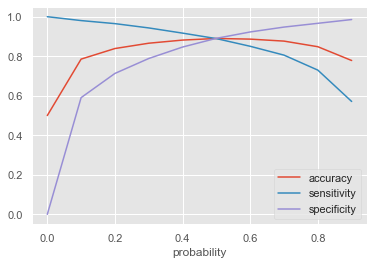

In [176]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At approx 0.5` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. The optimum probability cutoff is **0.5** for acheiving higher sensitivity, which is our main goal.

In [177]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.020555,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.008303,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.888401,2,1,1,1,1,1,1,1,1,1,0,1
3,0,0.463657,3,1,1,1,1,1,0,0,0,0,0,0
4,0,0.053930,4,1,0,0,0,0,0,0,0,0,0,0


In [178]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[18408  2261]
 [ 2291 18378]]


In [179]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [180]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8898834002612608
Sensitivity:- 0.8891576757462867
Specificity:- 0.890609124776235


In [181]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

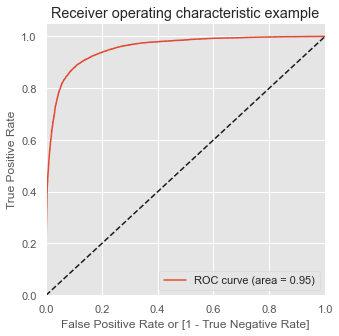

In [182]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

ROC curve is closer to 1, whic is the Gini of the model.

### Evaluating the model on the test set

In [183]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [184]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[rfe_columns]

##### Predictions on the test set with final model

In [185]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)
# Predict on the test set
y_test_pred = log_no_pca_13.predict(X_test_sm)
y_test_pred.head()

16575    0.000012
10086    0.446139
18646    0.503220
10925    0.153838
24503    0.062492
dtype: float64

In [186]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
16575,0.000012
10086,0.446139
18646,0.503220
10925,0.153838
24503,0.062492


In [187]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
16575,0
10086,0
18646,0
10925,1
24503,0


In [188]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [189]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [191]:
y_test_pred_final.head()

,churn,CustID,0
0,0,16575,0.000012
1,0,10086,0.446139
2,0,18646,0.503220
3,1,10925,0.153838
4,0,24503,0.062492


In [192]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})


# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

y_test_pred_final.head()

,CustID,churn,churn_prob
0,16575,0,0.000012
1,10086,0,0.446139
2,18646,0,0.503220
3,10925,1,0.153838
4,24503,0,0.062492


In [193]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [194]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,16575,0,0.000012,0
1,10086,0,0.446139,0
2,18646,0,0.503220,1
3,10925,1,0.153838,0
4,24503,0,0.062492,0


In [195]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[6131  760]
 [ 155  455]]


In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8780162644980669
Sensitivity:- 0.7459016393442623
Specificity:- 0.8897112175301117


***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.89
    - Specificity = 0.88
- Test set
    - Accuracy = 0.88
    - Sensitivity = 0.75
    - Specificity = 0.89
    
Overall, the model is performing well in the test set

#### Final conclusion

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

In [198]:
#Final Model coefficients
log_no_pca_13.params.sort_values(ascending=True)

monthly_3g_7            -8.171302
sachet_3g_7             -7.275055
night_pck_user_7        -6.479071
monthly_3g_6            -5.546327
sachet_3g_6             -4.956481
std_og_t2c_mou_8        -4.466358
sachet_2g_8             -2.898600
monthly_2g_8            -2.813727
night_pck_user_6        -2.272230
monthly_3g_8            -2.053584
monthly_2g_6            -1.933096
sachet_2g_6             -1.808300
sachet_3g_8             -1.675111
monthly_2g_7            -1.201626
total_og_mou_6          -1.084402
total_og_mou_diff       -1.035502
fb_user_6               -0.914866
loc_ic_mou_6            -0.737563
offnet_mou_8            -0.723427
fb_user_7               -0.679966
loc_og_t2m_mou_8        -0.606610
total_ic_mou_7          -0.582724
loc_og_t2t_mou_8        -0.554118
last_day_rch_amt_8      -0.528356
total_rech_num_diff     -0.514016
std_og_t2t_mou_7        -0.482177
loc_ic_t2m_mou_8        -0.462284
loc_og_mou_7            -0.460286
av_rech_amt_data_8      -0.457296
loc_ic_mou_dif

##### Critical  Features


* monthly_3g_7  :          -8.171302

* sachet_3g_7    :         -7.275055

* night_pck_user_7 :        -6.479071

* monthly_3g_6      :      -5.546327

* sachet_3g_6        :     -4.956481

* std_og_mou_6       :     0.921640

* loc_og_mou_8        :     1.099322

* loc_og_mou_8         :    1.099322

* total_rech_data_6     :   2.118939

* total_rech_data_8    :    2.700251

* count_rech_3g_6       :   4.089698

* count_rech_3g_7        :  7.383122

#### Recommendataions for Business


1. Customers whose minutes of usage of the outgoinh local calls and  ISD calls are less in the action phase should be targeted and attended.
2. Customers whose recharges have reduced in the action phase are likely to churn should be targetted.
3. Cutomers with decreasing monthly 3g usage have high chances of churning.
4. Customers whose aon is less or decreasing also have high chances of churning.
5. Customers whose average revenue has decreased from good phase to action phase also needs to be targetted as these customers reuglarly use different packs like Night packs, mobile usages, sachets etc.